In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import os
from datetime import datetime, timedelta
import shutil
import glob

In [106]:
plt.rcParams.update({'font.size': 11, 'axes.labelsize': 10, 'axes.titlesize': 16})
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
#plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'black'
#plt.rcParams['ytick.color'] = 'white'
plt.rcParams['figure.figsize'] = (22, 11)

# Grid with opacity and in background
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['axes.axisbelow'] = True

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'black'
#plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'black'
# plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'gray'
plt.rcParams['text.color'] = 'black'
sns.set_palette("viridis")


In [107]:
# Set TODAY DATE
# today_date = pd.Timestamp.now(tz='UTC')
today_date = pd.Timestamp('2025-05-23', tz='UTC') # For testing purposes
today_iso = pd.to_datetime(today_date).isocalendar()


# Set REFUND PERDIOD DURATION
REFUND_PERIOD_DAYS = 14  # Duration of the refund period in days

# Set thresholds for cleaning
HIGH_VOLUME_THRESHOLD = 5
DUPLICATE_THRESHOLD_MINUTES = 15


# Set DIRECTORIES
data_dir = 'both_csv_go_here'
archive_csv_dir = 'archive/csv'
archive_png_dir = 'archive/analysis/png'
archive_pdf_dir = 'archive/analysis/pdf'
analysis_dir = 'analysis'

In [108]:
def get_file_creation_date(file_path):
    """
    Get the creation date of a file and return it as a formatted string
    Returns format: YYYY-MM-DD
    """
    try:
        # Get file creation time (or modification time if creation not available)
        if os.name == 'nt':  # Windows
            creation_time = os.path.getctime(file_path)
        else:  # Unix/Linux/Mac
            creation_time = os.path.getmtime(file_path)

        # Convert to datetime and format
        creation_date = datetime.fromtimestamp(creation_time)
        return creation_date.strftime('%Y-%m-%d')

    except Exception as e:
        print(f"❌ Error getting creation date for {file_path}: {e}")
        # Fallback to today's date
        return datetime.now().strftime('%Y-%m-%d')


def transfer_files_to_archive():
    """
    Enhanced version with date-based organization
    Transfer PNG files from analysis_dir to archive_png_dir/YYYY-MM-DD/
    Transfer PDF files from analysis_dir to archive_pdf_dir/YYYY-MM-DD/
    """
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # === TRANSFER PNG FILES ===
    png_files = glob.glob(os.path.join(analysis_dir, "*.png"))
    png_transferred = 0

    for png_file in png_files:
        filename = os.path.basename(png_file)

        # Get creation date for organization
        creation_date = get_file_creation_date(png_file)

        # Create date-based directory in archive
        date_archive_dir = os.path.join(archive_png_dir, creation_date)
        os.makedirs(date_archive_dir, exist_ok=True)

        # Set destination with date organization
        destination = os.path.join(date_archive_dir, filename)

        try:
            # Copy file to archive (keep original in analysis_dir)
            shutil.copy2(png_file, destination)
            print(f"📊 PNG archived: {creation_date}/{filename}")
            png_transferred += 1
        except Exception as e:
            print(f"❌ Error archiving PNG {filename}: {e}")

    # === TRANSFER PDF FILES ===
    pdf_files = glob.glob(os.path.join(analysis_dir, "*.pdf"))
    pdf_transferred = 0

    for pdf_file in pdf_files:
        filename = os.path.basename(pdf_file)

        # Get creation date for organization
        creation_date = get_file_creation_date(pdf_file)

        # Create date-based directory in archive
        date_archive_dir = os.path.join(archive_pdf_dir, creation_date)
        os.makedirs(date_archive_dir, exist_ok=True)

        # Set destination with date organization
        destination = os.path.join(date_archive_dir, filename)

        try:
            # Copy file to archive (keep original in analysis_dir)
            shutil.copy2(pdf_file, destination)
            print(f"📄 PDF archived: {creation_date}/{filename}")
            pdf_transferred += 1
        except Exception as e:
            print(f"❌ Error archiving PDF {filename}: {e}")

    # === SUMMARY ===
    print(f"\n📦 ARCHIVING SUMMARY ({timestamp}):")
    print(f"   PNG files transferred: {png_transferred}")
    print(f"   PDF files transferred: {pdf_transferred}")
    print(f"   Total files archived: {png_transferred + pdf_transferred}")

    return png_transferred, pdf_transferred


def clean_analysis_dir_after_archive():
    """
    OPTIONAL: Remove files from analysis_dir after successful archiving
    USE WITH CAUTION - This will delete the original files!
    Enhanced with better logging and date information
    """
    # Get all PNG and PDF files in analysis_dir
    png_files = glob.glob(os.path.join(analysis_dir, "*.png"))
    pdf_files = glob.glob(os.path.join(analysis_dir, "*.pdf"))
    all_files = png_files + pdf_files

    if not all_files:
        print("🗑️  No files to clean in analysis directory")
        return 0

    print(f"🗑️  Cleaning {len(all_files)} files from {analysis_dir}...")

    cleaned_files = 0

    for file_path in all_files:
        try:
            filename = os.path.basename(file_path)
            creation_date = get_file_creation_date(file_path)

            os.remove(file_path)
            print(f"🗑️  Cleaned: {filename} (was from {creation_date})")
            cleaned_files += 1

        except Exception as e:
            print(f"❌ Error cleaning {file_path}: {e}")

    print(f"🧹 Cleanup complete: {cleaned_files} files removed from {analysis_dir}")
    return cleaned_files


transfer_files_to_archive()
clean_analysis_dir_after_archive()


📊 PNG archived: 2025-06-30/weekly_trials_8_weeks_2025-05-23.png
📊 PNG archived: 2025-06-30/weekly_flow_all_time_2025-05-23.png
📊 PNG archived: 2025-06-30/weekly_flow_8_weeks_2025-05-23.png
📊 PNG archived: 2025-06-30/weekly_renewal_flow_8_weeks_2025-05-23.png
📊 PNG archived: 2025-06-30/weekly_renewal_flow_all_time_2025-05-23.png
📊 PNG archived: 2025-06-30/weekly_trials_all_time_2025-05-23.png

📦 ARCHIVING SUMMARY (2025-06-30 19:49:11):
   PNG files transferred: 6
   PDF files transferred: 0
   Total files archived: 6
🗑️  Cleaning 6 files from analysis...
🗑️  Cleaned: weekly_trials_8_weeks_2025-05-23.png (was from 2025-06-30)
🗑️  Cleaned: weekly_flow_all_time_2025-05-23.png (was from 2025-06-30)
🗑️  Cleaned: weekly_flow_8_weeks_2025-05-23.png (was from 2025-06-30)
🗑️  Cleaned: weekly_renewal_flow_8_weeks_2025-05-23.png (was from 2025-06-30)
🗑️  Cleaned: weekly_renewal_flow_all_time_2025-05-23.png (was from 2025-06-30)
🗑️  Cleaned: weekly_trials_all_time_2025-05-23.png (was from 2025-06-3

6

In [109]:
# LOADING CSV

# Toggle this flag to True in production
RENAME_FILES = False
MOVE_FILES = False

# Ensure archive directory exists
os.makedirs(archive_csv_dir, exist_ok=True)


# List and sort files by creation time
files = [
    os.path.join(data_dir, f)
    for f in os.listdir(data_dir)
    if os.path.isfile(os.path.join(data_dir, f)) and f.endswith('.csv')]
sorted_files = sorted(files, key=os.path.getctime, reverse=True)

# Check if we have exactly 2 CSV files
if len(sorted_files) != 2:
    print(f"Error: Expected 2 CSV files, found {len(sorted_files)}")
    print("Files found:", [os.path.basename(f) for f in sorted_files])
    exit(1)

for i, file_path in enumerate(sorted_files, 1):
    print(f"  File {i}:\n {os.path.basename(file_path)}")

# Loop over files
processed_files = []
for file_path in sorted_files:
    created_at = datetime.fromtimestamp(os.path.getctime(file_path))
    timestamp_str = created_at.strftime('%Y-%m-%d_%H-%M')
    original_name = os.path.basename(file_path)
    new_name = f"{timestamp_str}_{original_name}"

    if RENAME_FILES:
        if not original_name.startswith(timestamp_str):
            new_path = os.path.join(data_dir, new_name)
            os.rename(file_path, new_path)
            print(f"Renamed:\n {original_name} →\n {new_name}\n")
            processed_files.append(new_path)
        else:
            processed_files.append(file_path)
    else:
        processed_files.append(file_path)

# Load both CSV files into pandas DataFrames
file1_path, file2_path = processed_files[0], processed_files[1]
print(f"\nLoading CSV files:")
print(f"  File 1: {os.path.basename(file1_path)}")
print(f"  File 2: {os.path.basename(file2_path)}")

#### Niklas Code ####

# Load both CSV files into pandas DataFrames
file1_path, file2_path = processed_files[0], processed_files[1]
print(f"\nLoading CSV files:")
print(f"  File 1: {os.path.basename(file1_path)}")
print(f"  File 2: {os.path.basename(file2_path)}")

try:
    # Determine which file is which based on filename content
    if 'subscription' in os.path.basename(file1_path).lower():
        sub_raw = pd.read_csv(file1_path, low_memory=False)
        inv_raw = pd.read_csv(file2_path, low_memory=False)
        print(f"  File 1 identified as subscription data")
        print(f"  File 2 identified as invoice data")
    elif 'subscription' in os.path.basename(file2_path).lower():
        sub_raw = pd.read_csv(file2_path, low_memory=False)
        inv_raw = pd.read_csv(file1_path, low_memory=False)
        print(f"  File 2 identified as subscription data")
        print(f"  File 1 identified as invoice data")
    else:
        # Fallback: assume first file is subscription, second is invoice
        sub_raw = pd.read_csv(file1_path, low_memory=False)
        inv_raw = pd.read_csv(file2_path, low_memory=False)
        print(f"  Using fallback: File 1 as subscription, File 2 as invoice")

    print(f"\nSuccessfully loaded:")
    print(f"  sub_raw: {sub_raw.shape[0]} rows, {sub_raw.shape[1]} columns")
    print(f"  inv_raw: {inv_raw.shape[0]} rows, {inv_raw.shape[1]} columns")
except Exception as e:
    print(f"Error loading CSV files: {e}")
    exit(1)



# try:
#     sub_raw = pd.read_csv(file1_path, low_memory=False)
#     inv_raw = pd.read_csv(file2_path, low_memory=False)
#     print(f"\nSuccessfully loaded:")
#     print(f"  sub_raw: {sub_raw.shape[0]} rows, {sub_raw.shape[1]} columns")
#     print(f"  inv_raw: {inv_raw.shape[0]} rows, {inv_raw.shape[1]} columns")
# except Exception as e:
#     print(f"Error loading CSV files: {e}")
#     exit(1)

# Move files to archive
if MOVE_FILES:
    for file_path in processed_files:
        file_name = os.path.basename(file_path)
        archive_path = os.path.join(archive_csv_dir, file_name)

        if not os.path.exists(archive_path):
            os.rename(file_path, archive_path)
            print(f"Moved: {file_name} to archive")
        else:
            print(f"Already archived: {file_name}")
else:
    for file_path in processed_files:
        file_name = os.path.basename(file_path)

print("\nDataFrames available as: sub_raw, inv_raw")
print("\nProcessing complete!")
print('***************************************************')


  File 1:
 DishpatchSubscriptionData_NIklas_Sanitised - subscriptions.csv
  File 2:
 DishpatchInvoiceData_NIklas_Sanitised - invoices.csv

Loading CSV files:
  File 1: DishpatchSubscriptionData_NIklas_Sanitised - subscriptions.csv
  File 2: DishpatchInvoiceData_NIklas_Sanitised - invoices.csv

Loading CSV files:
  File 1: DishpatchSubscriptionData_NIklas_Sanitised - subscriptions.csv
  File 2: DishpatchInvoiceData_NIklas_Sanitised - invoices.csv
  File 1 identified as subscription data
  File 2 identified as invoice data

Successfully loaded:
  sub_raw: 20443 rows, 34 columns
  inv_raw: 33239 rows, 53 columns

DataFrames available as: sub_raw, inv_raw

Processing complete!
***************************************************


In [110]:
# DATA PREPROCESSING (customer_df)
def preprocess_data(input_df):
    """Clean and preprocess the subscription data"""
    df = input_df.copy()

    # Date conversion
    date_cols = [col for col in df.columns if '(UTC)' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce', utc=True)

    df = df.sort_values(by='Created (UTC)')

    # Column selection and renaming
    columns_to_keep = [
        'id', 'Customer Name', 'Customer ID', 'Status', 'Cancellation Reason',
        'Created (UTC)', 'Start (UTC)', 'Current Period Start (UTC)',
        'Current Period End (UTC)', 'Trial Start (UTC)', 'Trial End (UTC)',
        'Canceled At (UTC)', 'Ended At (UTC)', 'senderShopifyCustomerId (metadata)'
    ]

    df = df[columns_to_keep]

    df.rename(columns={
        'id': 'subscription_id',
        'Customer ID': 'customer_id',
        'Customer Name': 'customer_name',
        'Status': 'status',
        'Cancellation Reason': 'cancellation_reason',
        'Created (UTC)': 'created_utc',
        'Start (UTC)': 'start_utc',
        'Current Period Start (UTC)': 'current_period_start_utc',
        'Current Period End (UTC)': 'current_period_end_utc',
        'Trial Start (UTC)': 'trial_start_utc',
        'Trial End (UTC)': 'trial_end_utc',
        'Canceled At (UTC)': 'canceled_at_utc',
        'Ended At (UTC)': 'ended_at_utc',
        'senderShopifyCustomerId (metadata)': 'is_gifted_member'
    }, inplace=True)

    # Convert is_gifted_member to boolean
    df['is_gifted_member'] = df['is_gifted_member'].notna()


    # Reference date for analysis
    print(f"📅 Reference date (TODAY) : {today_date.strftime('%d-%m-%Y')}")
    print(f"{len(df)} entries loaded from {file_path}")
    print('***************************************************')

    return df

sub_df = preprocess_data(sub_raw)

📅 Reference date (TODAY) : 23-05-2025
20443 entries loaded from both_csv_go_here/DishpatchInvoiceData_NIklas_Sanitised - invoices.csv
***************************************************


In [111]:
# REMOVE ALL MULTI-SUB customer_id from sub_df, put them im a new df multisub_df
def remove_multi_subscriptions(df):
    """Remove customers with multiple subscriptions and return a new DataFrame"""
    df = df.copy()

    # Count subscriptions per customer
    subscription_counts = df['customer_id'].value_counts()

    # Get customers with more than one subscription
    multi_sub_customers = subscription_counts[subscription_counts > 1].index.tolist()

    # Filter out these customers from the main DataFrame
    single_sub_df = df[~df['customer_id'].isin(multi_sub_customers)]

    # Create a new DataFrame for multi-subscription customers
    multi_sub_df = df[df['customer_id'].isin(multi_sub_customers)]

    print(f"Removed {len(multi_sub_customers)} customers with multiple subscriptions.")
    print(f"Total single_sub_df: {len(single_sub_df)}, with {len(single_sub_df['customer_id'].unique())} unique customers")
    print(f"Total multi_sub_df: {len(multi_sub_df)}, with {len(multi_sub_df['customer_id'].unique())} unique customers")


    return single_sub_df, multi_sub_df


sub_df, multisub_df = remove_multi_subscriptions(sub_df)

Removed 377 customers with multiple subscriptions.
Total single_sub_df: 19599, with 19599 unique customers
Total multi_sub_df: 844, with 377 unique customers


In [112]:
# DATA PREPROCESSING (invoices df)
def preprocess_data_invoice(input_df):
    """Clean and preprocess the subscription data"""
    df = input_df.copy()

    # Date conversion
    date_cols = [col for col in df.columns if '(UTC)' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce', utc=True)


    # Column selection and renaming
    columns_to_keep = [
        'id', 'Customer Name', 'Customer', 'Amount Due', 'Amount Paid', 'Paid', 'Billing', 'Charge', 'Closed',
        'Date (UTC)', 'Description', 'Number', 'Finalized At (UTC)',
        'Paid At (UTC)', 'Minimum Line Item Period Start (UTC)', 'Maximum Line Item Period End (UTC)',
        'Period End (UTC)', 'Subscription', 'Total Discount Amount', 'Applied Coupons', 'Status'
        ]

    df = df[columns_to_keep]

    df.rename(columns={
        'id': 'invoice_id',
        'Status': 'inv_status',
        'Customer': 'customer_id',
        'Customer Name': 'customer_name',
        'Date (UTC)' : 'date_utc',
        'Description': 'description',
        'Paid At (UTC)': 'paid_at_utc',
        'Amount Paid': 'amount_paid',
        'Subscription': 'subscription_id',
    }, inplace=True)

    return df

inv_df = preprocess_data_invoice(inv_raw)

In [113]:
# Removing customers with more than 5 subscriptions (Probably testing accounts)
def remove_high_volume_customers(df, threshold=HIGH_VOLUME_THRESHOLD):
    """Remove customers with more than a specified number of subscriptions"""
    df = df.copy()

    original_count = len(df)

    customer_counts = df['customer_id'].value_counts()
    high_volume_customers = customer_counts[customer_counts > threshold].index

    df = df[~df['customer_id'].isin(high_volume_customers)]

    print(f'{original_count - len(df)} subscriptions removed from \
{len(high_volume_customers)} customers with more than {threshold} subscriptions')
    print('***************************************************')

    return df


sub_df = remove_high_volume_customers(sub_df)

0 subscriptions removed from 0 customers with more than 5 subscriptions
***************************************************


In [114]:
# CANCEL DURING TRIAL PERIOD
def cancel_during_trial(df):
    """Check if a member canceled during their trial period"""
    df =df.copy()

    df['canceled_during_trial'] = (
        (df['canceled_at_utc'].notna()) &
        (df['trial_end_utc'] > df['canceled_at_utc'])
    )
    return df

sub_df = cancel_during_trial(sub_df)

In [115]:
# REFUND PERIOD END TIME
# This function sets the 'refund_period_end_utc' column for each subscription.
# The refund period end date is calculated differently depending on whether the subscription started with a trial:
# - If 'trial_start_utc' is not null (i.e., the subscription had a trial), the refund period ends REFUND_PERIOD_DAYS after the trial ends ('trial_end_utc').
# - If there was no trial ('trial_start_utc' is null), the refund period ends REFUND_PERIOD_DAYS after the current paid period starts ('current_period_start_utc').
def refund_period_end_utc(df, REFUND_PERIOD_DAYS):
    df = df.copy()
    df['refund_period_end_utc'] = np.where(
        df['trial_start_utc'].notna() &
        (df['trial_end_utc'] > df['current_period_start_utc']),
        df['trial_end_utc'] + pd.Timedelta(days=REFUND_PERIOD_DAYS),
        df['current_period_start_utc'] + pd.Timedelta(days=REFUND_PERIOD_DAYS)
    )
    return df

# Apply the function to the subscriptions DataFrame
sub_df = refund_period_end_utc(sub_df, REFUND_PERIOD_DAYS)

In [116]:
# CANCEL DURRING REFUND PERIOD
def canceled_during_refund_period(df):
    """Check if a member canceled during their refund period"""
    df = df.copy()

    df['canceled_during_refund_period'] = (
        (df['canceled_at_utc'].notna()) &
        (df['canceled_during_trial'] == False) &
        (df['refund_period_end_utc'] > df['canceled_at_utc'])
    )
    return df

sub_df = canceled_during_refund_period(sub_df)


In [117]:
# FULL MEMBER STATUS
def full_member_status(df):
    """Determine if a customer is a full member based on business logic"""
    df = df.copy()

    # Full member if:
    # 1. Not canceled during trial
    # 2. Not canceled during refund period
    # 3. Not gifted
    # 4. Trial ended more than 14 days ago (if no trial, current_period_start_utc > 14 days ago)

    no_early_cancellation = (
        (~df['canceled_during_trial']) &
        (~df['canceled_during_refund_period'])
    )

    not_gifted = (~df['is_gifted_member'])

    refund_period_passed = (
            (today_date > df['refund_period_end_utc'])
            )

    df['is_full_member'] = (
        no_early_cancellation &
        not_gifted &
        refund_period_passed
    )

    return df

sub_df = full_member_status(sub_df)


In [118]:
# PAYING MEMBERS
def paying_members(df):
    """Determine if a customer is a paying member"""
    df = df.copy()

    # Paying member if:
    # 1. Not canceled
    # 2. Not gifted

    no_early_cancellation = ~df['canceled_during_trial']

    not_gifted = (~df['is_gifted_member'])


    df['is_paying_member'] = (
        no_early_cancellation &
        not_gifted
    )

    return df

sub_df = paying_members(sub_df)

In [119]:
# add ended_at_utc when needed
def add_ended_at_utc(df, today_date):
    """add ended_at_utc when needed"""
    df = df.copy()

    # if canceled during trial, set ended_at_utc to trial_end_utc
    df['ended_at_utc'] = np.where(
        (df['ended_at_utc'].isna()) & (df['canceled_during_trial']),
        df['trial_end_utc'],
        df['ended_at_utc']
    )

    # if canceled during refund period, set ended_at_utc to canceled_at_utc
    df['ended_at_utc'] = np.where(
        (df['ended_at_utc'].isna()) &
        (df['canceled_during_refund_period']) &
        (~df['canceled_during_trial']),
        df['canceled_at_utc'],
        df['ended_at_utc']
    )

    # if canceled after refund period, set ended_at_utc to current_period_end_utc
    df['ended_at_utc'] = np.where(
        (df['ended_at_utc'].isna()) &
        (df['canceled_at_utc'].notna()) &
        (~df['canceled_during_refund_period']) &
        (~df['canceled_during_trial']),
        np.minimum(df['current_period_end_utc'], today_date),
        df['ended_at_utc']
    )

    # if cancel_at_utc == current_period_start_utc, ended_at_utc = cancel_at_utc
    df['ended_at_utc'] = np.where(
        (df['ended_at_utc'].isna()) &
        (df['canceled_at_utc'].notna()) &
        (df['current_period_start_utc'] == df['canceled_at_utc']),
        df['canceled_at_utc'],
        df['canceled_at_utc']
    )

    return df


sub_df = add_ended_at_utc(sub_df, today_date)


In [120]:
# CALCULATING DURATIONS
def calculate_duration(df, today_date):  # ← AJOUTER today_date en paramètre
    """Calculate various durations in days with proper business logic"""

    # Trial duration (if trial exists)
    df['trial_duration'] = (df['trial_end_utc'] - df['trial_start_utc']).dt.days.fillna(0)
    # df['trial_duration_planned'] = (df['trial_end_utc'] - df['trial_start_utc']).dt.days.fillna(0)

    # # Pour les annulations pendant trial, limiter trial_duration à la vraie utilisation
    # df['trial_duration'] = np.where(
    #     df['ended_at_utc'] < df['trial_end_utc'],  # Annulé pendant trial
    #     np.maximum(0, (df['ended_at_utc'] - df['trial_start_utc']).dt.days),  # Durée réelle
    #     df['trial_duration_planned']  # Sinon durée prévue
    # )

    # Current period duration
    df['current_period_duration'] = (df['current_period_end_utc'] - df['current_period_start_utc']).dt.days

    # Trial-only subscription
    df['trial_only_subscription'] = (
        df['trial_start_utc'].notna() &
        df['trial_end_utc'].notna() &
        (df['trial_duration'] == df['current_period_duration'])
    )

    # Gift duration (only for gifted members)
    df['gift_duration'] = df['current_period_duration'].where(df['is_gifted_member'], 0)

    # Days until end for active subscriptions
    df['end_in'] = ((df['current_period_end_utc'] - today_date).dt.days).where(df['status'] == 'active', np.nan)

    # ← MODIFICATION ICI : Limiter real_duration à la durée max possible
    df['real_duration'] = np.where(
        df['ended_at_utc'].notna(),
        #df['ended_at_utc'].notna() & (df['status'] != 'trialing'),
        (df['ended_at_utc'] - df['created_utc']).dt.days,
        (today_date - df['created_utc']).dt.days
    )

    # ← AJOUTER CETTE VALIDATION
    max_possible = (today_date - df['created_utc'].min()).days
    df['real_duration'] = np.minimum(df['real_duration'], max_possible)

    df['paid_duration'] = df['real_duration'] - df['trial_duration']

    return df

# ← MODIFICATION DE L'APPEL
sub_df = calculate_duration(sub_df, today_date)


In [121]:
def get_full_members_count(df):
    """Count the number of full members"""
    df = df.copy()

    df = df[df['is_full_member'] == True]
    df_active = df[df['status'] == 'active']
    df_not_active = df[df['status'] != 'active']


    dict_full_members = {'active': len(df_active),
                         'not_active': len(df_not_active),
                         'total': len(df)
                         }

    print(f"Total Active full member: {dict_full_members['active']}")
    print(f"Total not active full member: {dict_full_members['not_active']}")
    print(f"Total full member: {dict_full_members['total']}")


    return dict_full_members


dict_full_member = get_full_members_count(sub_df)


Total Active full member: 5333
Total not active full member: 1621
Total full member: 6954


In [122]:
def get_iso_week_bounds(year, week):
    jan_4 = datetime(year, 1, 4)
    week_1_monday = jan_4 - timedelta(days=jan_4.weekday())
    target_monday = week_1_monday + timedelta(weeks=week-1)
    target_sunday = target_monday + timedelta(days=6)

    return target_monday, target_sunday


def get_weeks_in_iso_year(year):
    dec_28 = datetime(year, 12, 28)

    return dec_28.isocalendar().week


def calculate_target_iso_week(today_iso, weeks_back):

    target_year, target_week = today_iso.year, today_iso.week

    # Reculer de X semaines
    for _ in range(weeks_back):
        target_week -= 1
        if target_week <= 0:
            target_year -= 1
            weeks_in_prev_year = get_weeks_in_iso_year(target_year)
            target_week = weeks_in_prev_year

    iso_week_key = f"{target_year}-W{target_week:02d}"

    return target_year, target_week, iso_week_key

In [123]:
def get_new_trial_last_week(df, today_iso, weeks_back=None):
    results = {}
    df = df[~df['is_gifted_member']].copy()

    df['iso_year'] = df['trial_start_utc'].dt.isocalendar().year
    df['iso_week'] = df['trial_start_utc'].dt.isocalendar().week
    df['iso_week_key'] = df['iso_year'].astype(str) + '-W' + df['iso_week'].astype(str).str.zfill(2)

    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back)
    monday, sunday = get_iso_week_bounds(target_year, target_week)

    target_trials = df[df['iso_week_key'] == target_week_key]
    trials_count = len(target_trials)

    results = {
        'trials_count': trials_count,
        'iso_week_key': target_week_key,
        'monday': monday,
        'sunday': sunday,
        'period_label': f"{monday.strftime('%d-%m-%Y')} > {sunday.strftime('%d-%m-%Y')}"
    }


    return results

new_trial_last_week = get_new_trial_last_week(sub_df, today_iso, weeks_back=1)
new_trial_prev_week = get_new_trial_last_week(sub_df, today_iso, weeks_back=2)

new_trial_last_week, new_trial_prev_week

({'trials_count': 110,
  'iso_week_key': '2025-W20',
  'monday': datetime.datetime(2025, 5, 12, 0, 0),
  'sunday': datetime.datetime(2025, 5, 18, 0, 0),
  'period_label': '12-05-2025 > 18-05-2025'},
 {'trials_count': 100,
  'iso_week_key': '2025-W19',
  'monday': datetime.datetime(2025, 5, 5, 0, 0),
  'sunday': datetime.datetime(2025, 5, 11, 0, 0),
  'period_label': '05-05-2025 > 11-05-2025'})

In [124]:
# Count trials that converted to full members
def get_conversion_rate_last_weeks(df, today_iso, weeks_back):
    results = {}
    df = df[~df['is_gifted_member']].copy()

    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back)
    monday, sunday = get_iso_week_bounds(target_year, target_week)

    new_trials_only = df[df['trial_start_utc'].notna()].copy()

    new_trials_only['expected_maturity_date'] = (new_trials_only['trial_end_utc'] + pd.Timedelta(days=REFUND_PERIOD_DAYS)).copy()

    week_end = sunday + timedelta(days=1)
    week_start_utc = pd.Timestamp(monday).tz_localize('UTC')
    week_end_utc = pd.Timestamp(week_end).tz_localize('UTC')

    mature_trials_this_week = new_trials_only[
        (new_trials_only['expected_maturity_date'] >= week_start_utc) &
        (new_trials_only['expected_maturity_date'] < week_end_utc)
    ].copy()

    total_trials = len(mature_trials_this_week)
    conversions = len(mature_trials_this_week[mature_trials_this_week['is_full_member'] == True]) if total_trials > 0 else 0
    conversion_rate = (conversions / total_trials * 100) if total_trials > 0 else 0.0

    results = {
        'conversion_rate': round(conversion_rate, 2),
        'total_trials': total_trials,
        'conversions': conversions,
        'iso_week_key': target_week_key,
        'week_start': monday,
        'week_end': sunday,
        'monday': monday,
        'sunday': sunday,
        'period': f"{monday.strftime('%d-%m-%Y')} > {sunday.strftime('%d-%m-%Y')}"}

    return results


last_week_conversion_rate = get_conversion_rate_last_weeks(sub_df, today_iso, weeks_back=1)
prev_week_conversion_rate = get_conversion_rate_last_weeks(sub_df, today_iso, weeks_back=2)

In [125]:
def get_churn_members_last_week(df, today_iso, weeks_back=1):
    df = df[~df['is_gifted_member']].copy()

    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back)
    week_start, week_end = get_iso_week_bounds(target_year, target_week)

    week_start_utc = pd.Timestamp(week_start).tz_localize('UTC')
    week_end_utc = pd.Timestamp(week_end + timedelta(days=1)).tz_localize('UTC')

    churned_members_mask = (
        (df['canceled_at_utc'] >= week_start_utc) &
        (df['canceled_at_utc'] < week_end_utc) &
        (df['is_full_member'] == True)
    )

    churned_members = df[churned_members_mask].copy()
    count = len(churned_members)

    results = {
        'count': count,
        'iso_week_key': target_week_key,
        'week_start': week_start,
        'week_end': week_end,
        'monday': week_start,
        'sunday': week_end,
        'period': f"{week_start.strftime('%d-%m-%Y')} > {week_end.strftime('%d-%m-%Y')}"
    }

    return results


last_week_churned_members = get_churn_members_last_week(sub_df, today_iso, weeks_back=1)
prev_week_churned_members = get_churn_members_last_week(sub_df, today_iso, weeks_back=2)
last_week_churned_members

{'count': 15,
 'iso_week_key': '2025-W20',
 'week_start': datetime.datetime(2025, 5, 12, 0, 0),
 'week_end': datetime.datetime(2025, 5, 18, 0, 0),
 'monday': datetime.datetime(2025, 5, 12, 0, 0),
 'sunday': datetime.datetime(2025, 5, 18, 0, 0),
 'period': '12-05-2025 > 18-05-2025'}

In [126]:
def cus_renewal(df):
    df = df[~df['is_gifted_member']].copy()

    # number of customers who had trial
    all_customers = df

    all_active_full_member = all_customers[(all_customers['is_full_member']) & (all_customers['status'] == 'active')]

    # number of customers who became full members (from trial)
    trial_to_full_member = all_customers[
        (~all_customers['canceled_during_trial']) &
        (all_customers['paid_duration'] > REFUND_PERIOD_DAYS)]


    # trial > full member conversion rate
    conversion_rate = (len(trial_to_full_member) / len(all_customers) * 100)


    # 1st year customers
    customers_in_y1 = trial_to_full_member[trial_to_full_member['paid_duration'] < 365]

    # active in 1st year
    active_in_y1 = customers_in_y1[customers_in_y1['status'] == 'active']

    # chrun during 1st year
    canceled_during_y1 = customers_in_y1[customers_in_y1['canceled_at_utc'].notna()]

    # cancelation rate during y1
    y1_cancelation_rate = (len(canceled_during_y1) / len(customers_in_y1) * 100)





    # customers eligible to year 2
    eligible_for_y2 = trial_to_full_member[trial_to_full_member['paid_duration'] >= 365]

    # customer currently in year 2
    customers_in_y2 = trial_to_full_member[
        (trial_to_full_member['paid_duration'] >= 365) &
        (trial_to_full_member['paid_duration'] <= 730)
    ]

    # Cancel during refund period y2
    refund_during_y2 = customers_in_y2[(customers_in_y2['canceled_at_utc'].notna()) & (customers_in_y2['paid_duration'] <= (365 + REFUND_PERIOD_DAYS))]

    y2_refund_rate = (len(refund_during_y2) / len(customers_in_y2) * 100) if len(customers_in_y2) > 0 else 0

    # currently active in y2
    active_in_y2 = customers_in_y2[customers_in_y2['status'] == 'active']

    # customer who renewed for a second year
    renewed_to_y2 = eligible_for_y2[eligible_for_y2['paid_duration'] >= (365 + REFUND_PERIOD_DAYS)]

    # customer who canceled in year 2
    canceled_during_y2 = renewed_to_y2[renewed_to_y2['canceled_at_utc'].notna()]

    # renewal rate from y1 to y2
    renewal_rate_y1_to_y2 = (len(renewed_to_y2) / len(eligible_for_y2) * 100)

    # cancelation rate during y2
    y2_cancelation_rate = (len(canceled_during_y2) / len(renewed_to_y2) * 100)





    # customers eligible to year 3
    eligible_for_y3 = trial_to_full_member[trial_to_full_member['paid_duration'] > 730]

    # customer currently in year 3
    customers_in_y3 = eligible_for_y3[eligible_for_y3['paid_duration'] <= 1095]

    # currently active in y3
    active_in_y3 = customers_in_y3[customers_in_y3['status'] == 'active']

    # Cancel during refund period y2
    refund_during_y3 = customers_in_y3[(customers_in_y3['canceled_at_utc'].notna()) & (customers_in_y3['paid_duration'] <= (730 + REFUND_PERIOD_DAYS))]
    y3_refund_rate = (len(refund_during_y3) / len(customers_in_y3) * 100) if len(customers_in_y3) > 0 else 0

    # customer who renewed for a second year
    renewed_to_y3 = eligible_for_y3[eligible_for_y3['paid_duration'] >= (730 + REFUND_PERIOD_DAYS)]

    # customer who canceled in year 3
    canceled_during_y3 = renewed_to_y3[renewed_to_y3['canceled_at_utc'].notna()]

    # renewal rate from y2 to y3
    renewal_rate_y2_to_y3 = (len(renewed_to_y3) / len(eligible_for_y3) * 100) if len(eligible_for_y3) > 0 else 0


    # cancelation rate during y3
    y3_cancelation_rate = (len(canceled_during_y3) / len(eligible_for_y3) * 100) if len(eligible_for_y3) > 0 else 0



    renewal_dict = {
        'all_customers_df' : all_customers,
        'all_customer' : len(all_customers),

        'trial_to_full_member_df' : trial_to_full_member,
        'trial_to_full_member' : len(trial_to_full_member),

        'conversion_rate' : round(conversion_rate, 2),

        'all_active_full_member_df' : all_active_full_member,
        'all_active_full_member' : len(all_active_full_member),

        'customers_in_y1_df' : customers_in_y1,
        'customers_in_y1' : len(customers_in_y1),

        'active_in_y1_df' : active_in_y1,
        'active_in_y1' : len(active_in_y1),

        'canceled_during_y1_df' : canceled_during_y1,
        'canceled_during_y1' : len(canceled_during_y1),

        'y1_cancelation_rate' : round(y1_cancelation_rate, 2),

        'eligible_for_y2_df' : eligible_for_y2,
        'eligible_for_y2' : len(eligible_for_y2),

        'customer_in_y2_df' : customers_in_y2,
        'customer_in_y2' : len(customers_in_y2),

        'active_in_y2_df' : active_in_y2,
        'active_in_y2' : len(active_in_y2),

        'renewed_to_y2_df' : renewed_to_y2,
        'renewed_to_y2' : len(renewed_to_y2),

        'canceled_during_y2_df' : canceled_during_y2,
        'canceled_during_y2' : len(canceled_during_y2),

        'refund_during_y2_df' : refund_during_y2,
        'refund_during_y2' : len(refund_during_y2),

        'refund_rate_y2': round(y2_refund_rate, 2),

        'y2_cancelation_rate' : y2_cancelation_rate,
        'renewal_rate_y1_to_y2' : round(renewal_rate_y1_to_y2, 2),

        'eligible_for_y3_df' : eligible_for_y3,
        'eligible_for_y3' : len(eligible_for_y3),

        'customer_in_y3_df' : customers_in_y3,
        'customer_in_y3' : len(customers_in_y3),

        'active_in_y3_df' : active_in_y3,
        'active_in_y3' : len(active_in_y3),

        'refund_during_y3_df': refund_during_y3,
        'refund_during_y3': len(refund_during_y3),

        'refund_rate_y3': round(y3_refund_rate, 2),

        'renewed_to_y3_df' : renewed_to_y3,
        'renewed_to_y3' : len(renewed_to_y3),

        'canceled_during_y3_df' : canceled_during_y3,
        'canceled_during_y3' : len(canceled_during_y3),

        'y3_cancelation_rate' : y3_cancelation_rate,
        'renewal_rate_y2_to_y3' : round(renewal_rate_y2_to_y3, 2)
        }

    return renewal_dict


renewal_dict = cus_renewal(sub_df)

In [127]:
print("Key, Value\n")
for key, value in renewal_dict.items():
    if not key.endswith('_df'):
        print(f"{key}: {value}")

Key, Value

all_customer: 18361
trial_to_full_member: 7220
conversion_rate: 39.32
all_active_full_member: 5333
customers_in_y1: 4982
active_in_y1: 3644
canceled_during_y1: 1358
y1_cancelation_rate: 27.26
eligible_for_y2: 2238
customer_in_y2: 2238
active_in_y2: 1725
renewed_to_y2: 1905
canceled_during_y2: 217
refund_during_y2: 290
refund_rate_y2: 12.96
y2_cancelation_rate: 11.391076115485564
renewal_rate_y1_to_y2: 85.12
eligible_for_y3: 0
customer_in_y3: 0
active_in_y3: 0
refund_during_y3: 0
refund_rate_y3: 0
renewed_to_y3: 0
canceled_during_y3: 0
y3_cancelation_rate: 0
renewal_rate_y2_to_y3: 0


In [128]:
def get_new_full_members_last_week(df, today_iso, weeks_back, REFUND_PERIOD_DAYS):
    renewal_dict = cus_renewal(sub_df)
    trial_to_full_member_df = renewal_dict['trial_to_full_member_df']

    df = trial_to_full_member_df[~trial_to_full_member_df['is_gifted_member']].copy()

    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back)
    week_start, week_end = get_iso_week_bounds(target_year, target_week)

    week_start_utc = pd.Timestamp(week_start).tz_localize('UTC')
    week_end_utc = pd.Timestamp(week_end + timedelta(days=1)).tz_localize('UTC')

    new_full_members_mask = (
        (df['refund_period_end_utc'] >= week_start_utc) &
        (df['refund_period_end_utc'] < week_end_utc)
    )


    new_full_members = df[new_full_members_mask].copy()
    count = len(new_full_members)

    results = {
        'count': count,
        'iso_week_key': target_week_key,
        'week_start': week_start,
        'week_end': week_end,
        'monday': week_start,
        'sunday': week_end,
        'period': f"{week_start.strftime('%d-%m-%Y')} > {week_end.strftime('%d-%m-%Y')}"
    }

    return results


last_week_new_full_member = get_new_full_members_last_week(sub_df, today_iso, 1, REFUND_PERIOD_DAYS)
prev_week_new_full_member = get_new_full_members_last_week(sub_df, today_iso, 2, REFUND_PERIOD_DAYS)
prev_week_new_full_member, last_week_new_full_member

({'count': 94,
  'iso_week_key': '2025-W19',
  'week_start': datetime.datetime(2025, 5, 5, 0, 0),
  'week_end': datetime.datetime(2025, 5, 11, 0, 0),
  'monday': datetime.datetime(2025, 5, 5, 0, 0),
  'sunday': datetime.datetime(2025, 5, 11, 0, 0),
  'period': '05-05-2025 > 11-05-2025'},
 {'count': 67,
  'iso_week_key': '2025-W20',
  'week_start': datetime.datetime(2025, 5, 12, 0, 0),
  'week_end': datetime.datetime(2025, 5, 18, 0, 0),
  'monday': datetime.datetime(2025, 5, 12, 0, 0),
  'sunday': datetime.datetime(2025, 5, 18, 0, 0),
  'period': '12-05-2025 > 18-05-2025'})

📊 Creating ALL TIME weekly flow analysis using standardized ISO calendar...
🗓️  Adding ISO week columns...
📅 Analysis from 2023-W43 to 2025-W23 (83 ISO weeks)
🔍 Immature cutoff at: 2025-W17
🔍 Immature period: 7 recent weeks
=== CALCULATING METRICS ===
📈 Total conversions (all time): 7,220
📉 Total churn (all time): 1,865
🎯 Net growth (all time): 5,355
📊 Final cumulative: 5,355
📁 All time chart saved: weekly_flow_all_time_2025-05-23.png


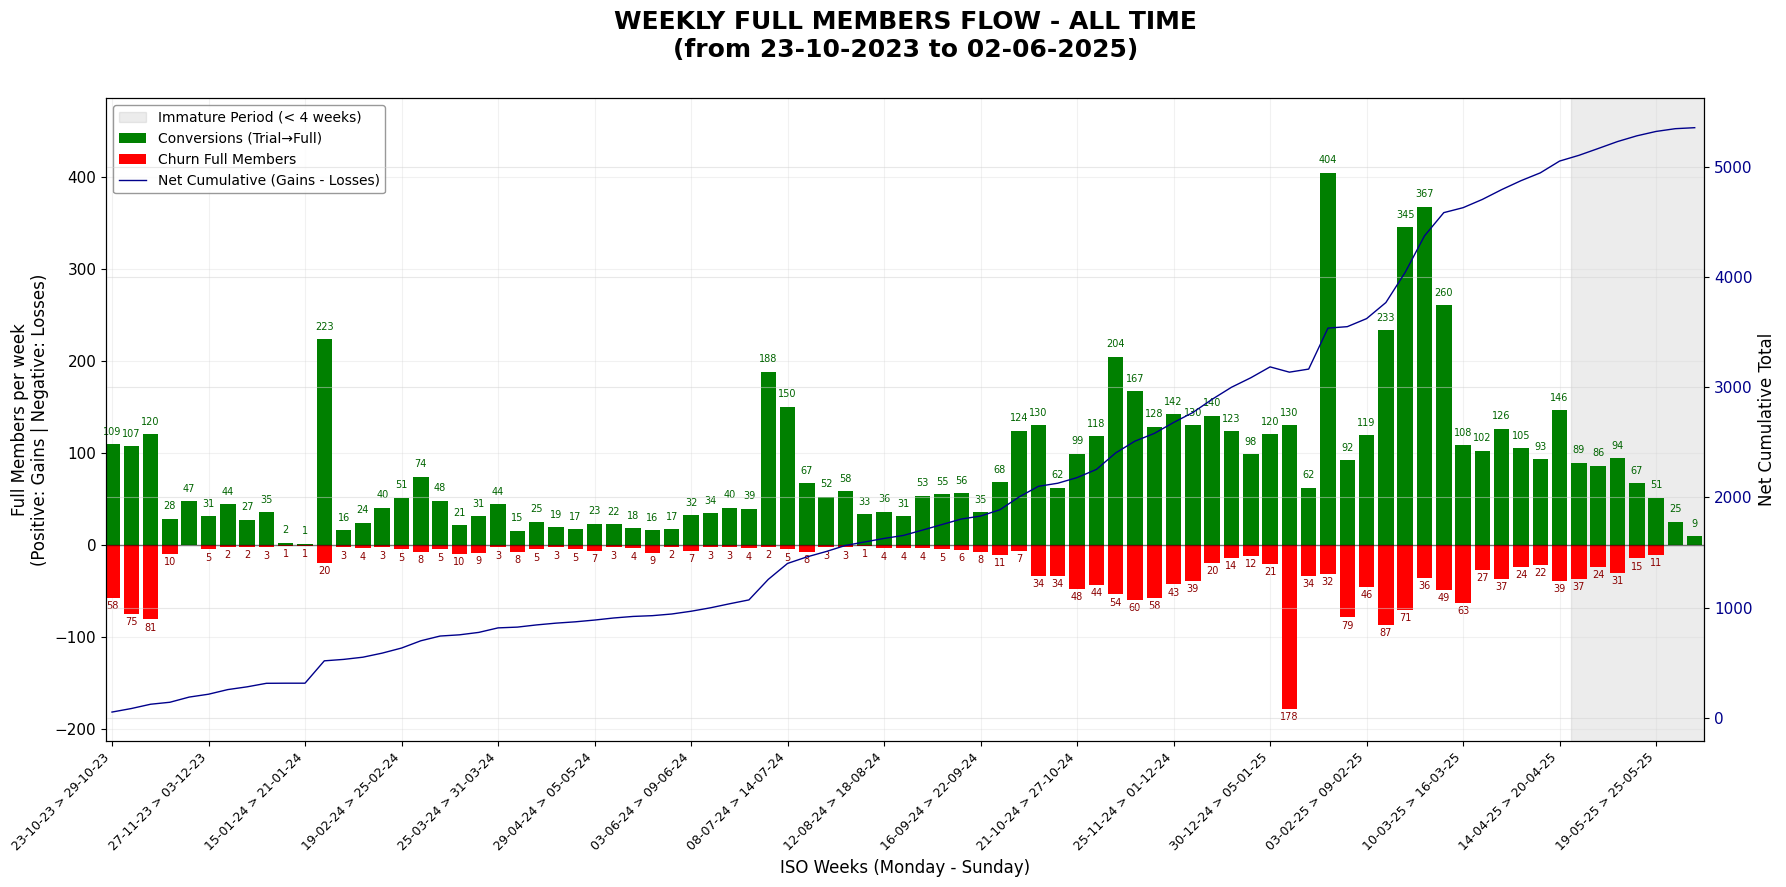

In [129]:
def weekly_flow_all_time(sub_df, today_date, today_iso):
    """
    Create a dual-axis chart with weekly metrics for ALL TIME using ISO calendar
    North: Conversions (Trial→Full)
    South: Churn full members
    + Cumulative line plot

    REFACTORED to use standardized ISO week functions
    """


    # Obtenir les données de renouvellement
    renewal_dict = cus_renewal(sub_df)
    trial_to_full_member_df = renewal_dict['trial_to_full_member_df']

    print("📊 Creating ALL TIME weekly flow analysis using standardized ISO calendar...")

    # === FONCTION HELPER POUR AJOUTER COLONNES ISO (Centralisée) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filtrer les dates valides pour éviter les <NA>
        valid_dates = df[date_column].notna()

        # Initialiser les colonnes avec des valeurs par défaut
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculer seulement pour les dates valides
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # === PRÉPARER LES DATAFRAMES AVEC ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # Conversions (créations de comptes)
    conversion_customers = add_iso_week_columns(trial_to_full_member_df, 'refund_period_end_utc')

    # Churn (annulations)
    churn_customers = add_iso_week_columns(trial_to_full_member_df.copy(), 'canceled_at_utc')

    # === CALCULER LES MÉTRIQUES HEBDOMADAIRES ISO ===
    # Filtrer les données valides avant groupby
    weekly_conversions = conversion_customers[conversion_customers['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn = churn_customers[churn_customers['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === DÉTERMINER LA PLAGE COMPLÈTE DES SEMAINES ISO ===
    all_iso_weeks = set()

    for series in [weekly_conversions, weekly_churn]:
        if len(series) > 0:
            all_iso_weeks.update(series.index.tolist())

    if not all_iso_weeks:
        print("❌ No data found")
        return {}

    # === UTILISER LA FONCTION DE TRI ISO STANDARDISÉE ===
    def sort_iso_weeks(week_keys):
        """Sort ISO week keys using standardized parsing"""
        def parse_week(week_key):
            try:
                year, week = week_key.split('-W')
                return (int(year), int(week))
            except (ValueError, AttributeError):
                print(f"⚠️  Invalid week key ignored: {week_key}")
                return (0, 0)

        # Filter valid week keys
        valid_weeks = [week for week in week_keys
                      if pd.notna(week) and isinstance(week, str) and '-W' in str(week)]
        return sorted(valid_weeks, key=parse_week)

    sorted_iso_weeks = sort_iso_weeks(list(all_iso_weeks))

    if not sorted_iso_weeks:
        print("❌ No valid ISO weeks after filtering")
        return {}

    # Obtenir les dates de début et fin pour affichage
    first_week_key = sorted_iso_weeks[0]
    last_week_key = sorted_iso_weeks[-1]

    print(f"📅 Analysis from {first_week_key} to {last_week_key} ({len(sorted_iso_weeks)} ISO weeks)")

    # === REINDEXER TOUTES LES SÉRIES À LA PLAGE COMPLÈTE ===
    weekly_conversions = weekly_conversions.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn = weekly_churn.reindex(sorted_iso_weeks, fill_value=0)

    # === CRÉER LES LABELS DE SEMAINES AVEC VRAIES DATES (UTILISANT get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in sorted_iso_weeks:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # UTILISER LA FONCTION STANDARDISÉE get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(sorted_iso_weeks))

    # === CALCULER LES CHANGEMENTS NETS ET CUMULÉS ===
    net_weekly = weekly_conversions - weekly_churn
    net_cumulative = net_weekly.cumsum()

    # === CRÉER LE GRAPHIQUE - ALL TIME ===
    fig, ax = plt.subplots(1, 1, figsize=(18, 9))

    # === BARPLOT POSITIF (NORD) ===
    ax.bar(x_pos, weekly_conversions, label='Conversions (Trial→Full)', color='green')

    # === BARPLOT NÉGATIF (SUD) ===
    ax.bar(x_pos, -weekly_churn, label='Churn Full Members', color='red')

    # === COURBE CUMULATIVE ===
    ax_twin = ax.twinx()
    ax_twin.plot(x_pos, net_cumulative, color='darkblue', linewidth=1,
                 label='Net Cumulative (Gains - Losses)')

    # === CONFIGURATION DES AXES ===
    ax.set_ylabel('Full Members per week\n(Positive: Gains | Negative: Losses)', fontsize=12)
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12)

    # === AJOUTER LES LABELS DE VALEURS ===
    for i, (conv, churn) in enumerate(zip(weekly_conversions, weekly_churn)):
        if conv > 0:
            ax.text(i, conv + max(weekly_conversions) * 0.02, str(int(conv)),
                   ha='center', va='bottom', fontsize=7, color='darkgreen')

        if churn > 0:
            ax.text(i, -churn - max(weekly_churn) * 0.02, str(int(churn)),
                   ha='center', va='top', fontsize=7, color='darkred')

    ax_twin.set_ylabel('Net Cumulative Total', fontsize=12)
    ax_twin.tick_params(axis='y', labelcolor='darkblue')

    # === CONFIGURATION VISUELLE ===
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax.grid(True, alpha=0.3)

    ax.set_xlim(-0.3, len(x_pos) - 0.5)

    # Ajuster les limites Y avec protection contre les séries vides
    if len(weekly_conversions) > 0 and max(weekly_conversions) > 0:
        y_max = max(weekly_conversions) * 1.2
    else:
        y_max = 1

    if len(weekly_churn) > 0 and max(weekly_churn) > 0:
        y_min = -max(weekly_churn) * 1.2
    else:
        y_min = -1

    ax.set_ylim(y_min, y_max)

    # Configuration de l'axe X - réduire les labels pour les longues périodes
    step = max(1, len(x_pos) // 15)
    ax.set_xticks(x_pos[::step])
    ax.set_xticklabels([week_labels[i] for i in x_pos[::step]],
                       rotation=45, ha='right', fontsize=9)


    # Calculer la semaine de coupure immature (4 semaines avant)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=4)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(sorted_iso_weeks):
        # Comparer les semaines ISO directement
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.15, color='gray',
                   label='Immature Period (< 4 weeks)', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITRES ET LÉGENDES ===
    start_date = week_dates[0].strftime("%d-%m-%Y") if week_dates else "N/A"
    end_date = week_dates[-1].strftime("%d-%m-%Y") if week_dates else "N/A"
    period_text = f'(from {start_date} to {end_date})'
    ax.set_title(f'WEEKLY FULL MEMBERS FLOW - ALL TIME\n{period_text}',
                 fontsize=18, fontweight='bold', pad=30)

    # Combiner les légendes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax_twin.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=10)

    # === MÉTRIQUES RÉSUMÉES ===
    print("=== CALCULATING METRICS ===")

    total_conversions = weekly_conversions.sum()
    total_churn = weekly_churn.sum()
    net_growth = total_conversions - total_churn
    final_cumulative = net_cumulative.iloc[-1] if len(net_cumulative) > 0 else 0

    print(f"📈 Total conversions (all time): {total_conversions:,}")
    print(f"📉 Total churn (all time): {total_churn:,}")
    print(f"🎯 Net growth (all time): {net_growth:,}")
    print(f"📊 Final cumulative: {final_cumulative:,}")

    plt.tight_layout()

    # === SAUVEGARDE ===
    filename = f"weekly_flow_all_time_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 All time chart saved: {filename}")
    plt.show()

    # === RETOUR DES DONNÉES ===
    return {
        'total_conversions': total_conversions,
        'total_churn': total_churn,
        'net_growth': net_growth,
        'final_cumulative': final_cumulative,
        'weekly_conversions': weekly_conversions,
        'weekly_churn': weekly_churn,
        'net_cumulative': net_cumulative,
        'iso_weeks': sorted_iso_weeks,
        'week_dates': week_dates,
        'num_weeks': len(sorted_iso_weeks)
    }


# === UTILISATION ===
weekly_flow_all_time_result = weekly_flow_all_time(sub_df, today_date, today_iso)

📊 Creating RENEWAL-FOCUSED weekly flow analysis using standardized ISO calendar...
🗓️  Adding ISO week columns...
📈 Calculating renewal metrics...
📅 Renewal analysis from 2024-W40 to 2025-W21 (34 ISO weeks)
🔍 Immature cutoff at: 2025-W19
🔍 Immature period: 3 recent weeks

=== RENEWAL METRICS SUMMARY ===
📈 Total Y1→Y2 renewals: 1,905
📈 Total Y2→Y3 renewals: 0
📈 Total renewals: 1,905
📉 Total post-renewal churn: 217
📉 Total refund churn: 227
📉 Total churn: 444
🎯 Net renewal growth: 1,461
📊 Renewal churn rate: 23.3%
📁 Renewal flow chart saved: weekly_renewal_flow_all_time_2025-05-23.png


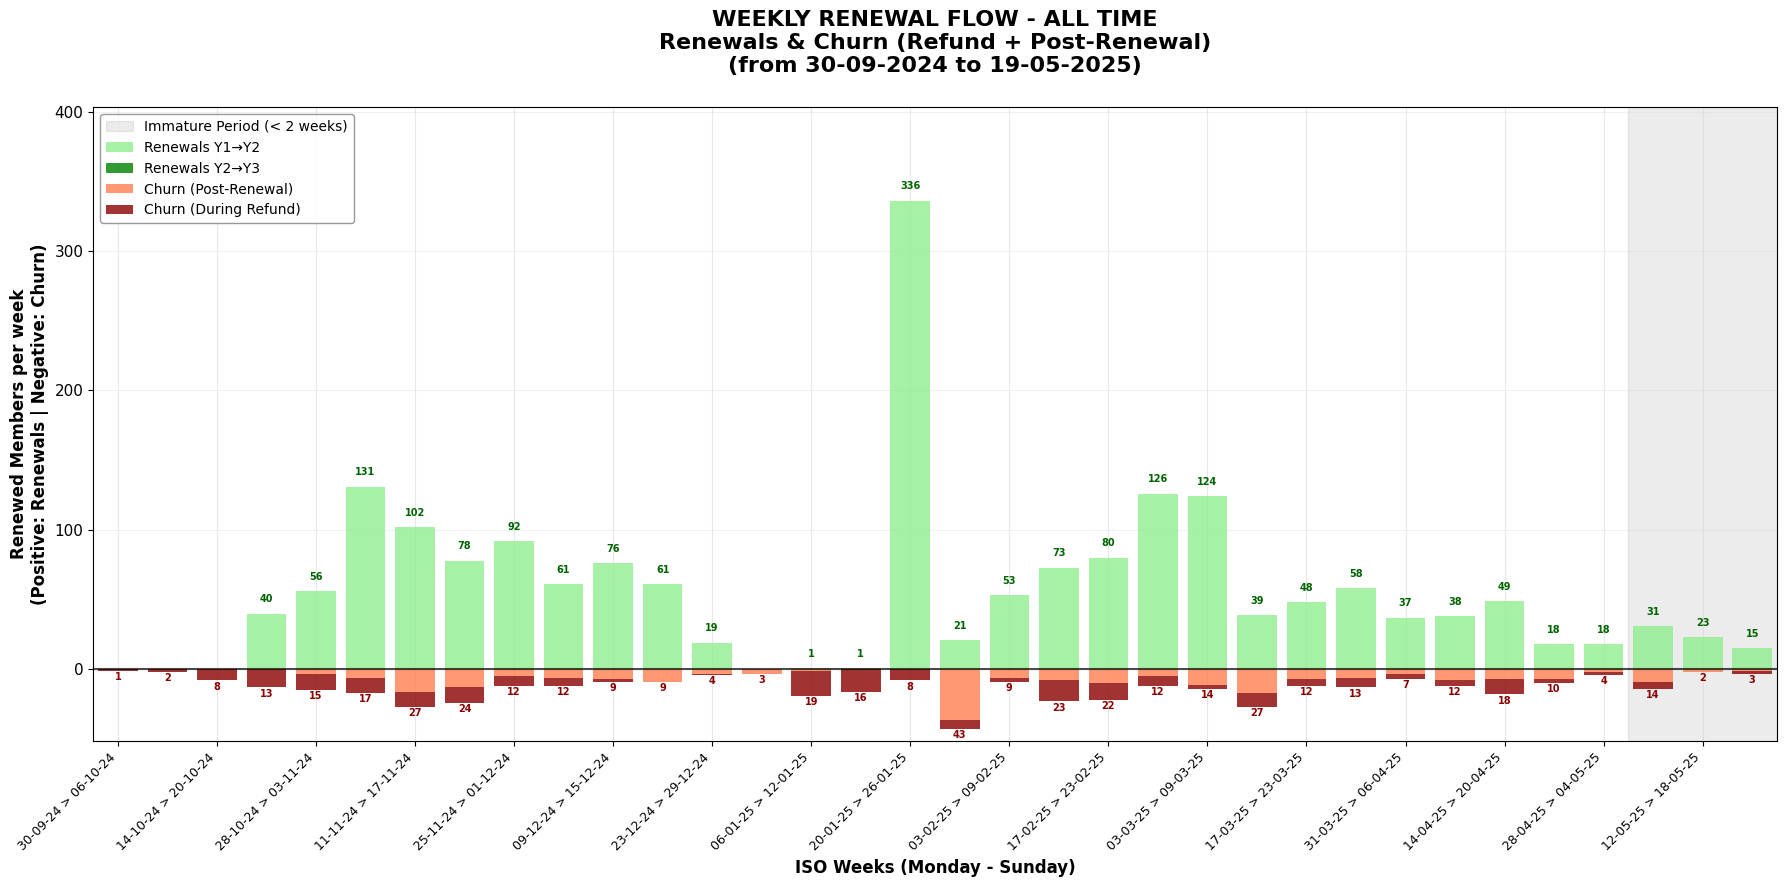

In [130]:
def weekly_renewal_flow_all_time(sub_df, today_date, today_iso):
    """
    Create a chart with weekly renewal metrics for ALL TIME using standardized ISO calendar
    FOCUS: Renewals only (Y1→Y2, Y2→Y3) and churn during refund + churn AFTER renewals
    North: Y1→Y2 Renewals + Y2→Y3 Renewals (stacked)
    South: Churn of renewed members only

    REFACTORED to use standardized ISO week functions and fix bugs
    """
    sub_df = sub_df[~sub_df['is_gifted_member']].copy()


    # Obtenir les données de renouvellement
    renewal_dict = cus_renewal(sub_df)

    renewed_to_y2_df = renewal_dict['renewed_to_y2_df']  # Customers qui ont renouvelé en Y2
    renewed_to_y3_df = renewal_dict['renewed_to_y3_df']  # Customers qui ont renouvelé en Y3
    customers_in_y2 = renewal_dict['customer_in_y2_df']
    customers_in_y3 = renewal_dict['customer_in_y3_df']

    print("📊 Creating RENEWAL-FOCUSED weekly flow analysis using standardized ISO calendar...")

    # === FONCTION HELPER POUR AJOUTER COLONNES ISO (Centralisée et standardisée) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filtrer les dates valides pour éviter les <NA>
        valid_dates = df[date_column].notna()

        # Initialiser les colonnes avec des valeurs par défaut
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculer seulement pour les dates valides
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # === PRÉPARER LES DATAFRAMES AVEC ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # RENEWALS: Moment où ils deviennent des renewed members (fin de refund period)
    y1_to_y2_renewals = add_iso_week_columns(renewed_to_y2_df.copy(), 'refund_period_end_utc')
    y2_to_y3_renewals = add_iso_week_columns(renewed_to_y3_df.copy(), 'refund_period_end_utc')

    # CHURN: Seulement les renewed members qui ont ensuite churned
    # Pour Y2 renewals qui ont churned
    churn_after_y2_renewal = renewed_to_y2_df[renewed_to_y2_df['canceled_at_utc'].notna()].copy()
    churn_after_y2_renewal = add_iso_week_columns(churn_after_y2_renewal, 'canceled_at_utc')

    # Pour Y3 renewals qui ont churned
    churn_after_y3_renewal = renewed_to_y3_df[renewed_to_y3_df['canceled_at_utc'].notna()].copy()
    churn_after_y3_renewal = add_iso_week_columns(churn_after_y3_renewal, 'canceled_at_utc')

    # Pour Y2 Churn During refund period
    churn_during_y2_renewal = customers_in_y2[
        (customers_in_y2['canceled_at_utc'].notna()) &
        (customers_in_y2['canceled_during_refund_period'])
    ].copy()
    churn_during_y2_renewal = add_iso_week_columns(churn_during_y2_renewal, 'canceled_at_utc')

    # Pour Y3 Churn During refund period
    churn_during_y3_renewal = customers_in_y3[
        (customers_in_y3['canceled_at_utc'].notna()) &
        (customers_in_y3['canceled_during_refund_period'])
    ].copy()
    churn_during_y3_renewal = add_iso_week_columns(churn_during_y3_renewal, 'canceled_at_utc')

    # === CALCULER LES MÉTRIQUES HEBDOMADAIRES ISO ===
    print("📈 Calculating renewal metrics...")

    # RENEWALS (gains)
    weekly_renewals_y1_to_y2 = y1_to_y2_renewals[y1_to_y2_renewals['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_renewals_y2_to_y3 = y2_to_y3_renewals[y2_to_y3_renewals['iso_week_key'].notna()].groupby('iso_week_key').size()

    # CHURN post-renewal (losses)
    weekly_churn_post_y2 = churn_after_y2_renewal[churn_after_y2_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn_post_y3 = churn_after_y3_renewal[churn_after_y3_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()

    # CHURN during refund period (losses)
    weekly_churn_refund_y2 = churn_during_y2_renewal[churn_during_y2_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn_refund_y3 = churn_during_y3_renewal[churn_during_y3_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === DÉTERMINER LA PLAGE COMPLÈTE DES SEMAINES ISO (CORRIGÉ) ===
    all_iso_weeks = set()

    # Collecter toutes les semaines de toutes les séries
    for series in [weekly_renewals_y1_to_y2, weekly_renewals_y2_to_y3,
                   weekly_churn_post_y2, weekly_churn_post_y3,
                   weekly_churn_refund_y2, weekly_churn_refund_y3]:
        if len(series) > 0:
            # Filtrer les valeurs valides
            valid_weeks = [week for week in series.index.tolist()
                          if pd.notna(week) and week != '<NA>' and isinstance(week, str)]
            all_iso_weeks.update(valid_weeks)

    if not all_iso_weeks:
        print("❌ No valid renewal data found")
        return {}

    # === UTILISER LA FONCTION DE TRI ISO STANDARDISÉE ===
    def sort_iso_weeks(week_keys):
        """Sort ISO week keys using standardized parsing"""
        def parse_week(week_key):
            try:
                if pd.isna(week_key) or week_key == '<NA>' or not isinstance(week_key, str):
                    return (0, 0)
                year, week = week_key.split('-W')
                return (int(year), int(week))
            except (ValueError, AttributeError):
                print(f"⚠️  Invalid week key ignored: {week_key}")
                return (0, 0)

        valid_weeks = [week for week in week_keys
                      if pd.notna(week) and week != '<NA>' and isinstance(week, str) and '-W' in str(week)]
        return sorted(valid_weeks, key=parse_week)

    sorted_iso_weeks = sort_iso_weeks(list(all_iso_weeks))

    if not sorted_iso_weeks:
        print("❌ No valid ISO weeks after filtering")
        return {}

    first_week_key = sorted_iso_weeks[0]
    last_week_key = sorted_iso_weeks[-1]

    print(f"📅 Renewal analysis from {first_week_key} to {last_week_key} ({len(sorted_iso_weeks)} ISO weeks)")

    # === REINDEXER TOUTES LES SÉRIES À LA PLAGE COMPLÈTE ===
    weekly_renewals_y1_to_y2 = weekly_renewals_y1_to_y2.reindex(sorted_iso_weeks, fill_value=0)
    weekly_renewals_y2_to_y3 = weekly_renewals_y2_to_y3.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn_post_y2 = weekly_churn_post_y2.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn_post_y3 = weekly_churn_post_y3.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn_refund_y2 = weekly_churn_refund_y2.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn_refund_y3 = weekly_churn_refund_y3.reindex(sorted_iso_weeks, fill_value=0)

    # Combiner le churn total
    weekly_total_churn_post_renewal = weekly_churn_post_y2 + weekly_churn_post_y3
    weekly_total_churn_refund_renewal = weekly_churn_refund_y2 + weekly_churn_refund_y3

    # === CRÉER LES LABELS DE SEMAINES AVEC VRAIES DATES (UTILISANT get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in sorted_iso_weeks:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # UTILISER LA FONCTION STANDARDISÉE get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(sorted_iso_weeks))

    # === CRÉER LE GRAPHIQUE - RENEWAL FOCUS ===
    fig, ax = plt.subplots(1, 1, figsize=(18, 9))

    # === BARPLOT POSITIF (NORD) - RENEWALS ===
    ax.bar(x_pos, weekly_renewals_y1_to_y2, label='Renewals Y1→Y2', color='lightgreen', alpha=0.8)
    ax.bar(x_pos, weekly_renewals_y2_to_y3, bottom=weekly_renewals_y1_to_y2,
           label='Renewals Y2→Y3', color='green', alpha=0.8)

    # === BARPLOT NÉGATIF (SUD) - CHURN EMPILÉ ===
    ax.bar(x_pos, -weekly_total_churn_post_renewal,
           label='Churn (Post-Renewal)', color='coral', alpha=0.8)

    ax.bar(x_pos, -weekly_total_churn_refund_renewal,
           bottom=-weekly_total_churn_post_renewal,
           label='Churn (During Refund)', color='darkred', alpha=0.8)

    # === CONFIGURATION DES AXES ===
    ax.set_ylabel('Renewed Members per week\n(Positive: Renewals | Negative: Churn)', fontsize=12, fontweight='bold')
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12, fontweight='bold')

    # === AJOUTER LES LABELS DE VALEURS (CORRIGÉ) ===
    for i, (ren1, ren2, churn1, churn2) in enumerate(zip(
        weekly_renewals_y1_to_y2, weekly_renewals_y2_to_y3,
        weekly_total_churn_post_renewal, weekly_total_churn_refund_renewal)):

        total_renewals = ren1 + ren2
        if total_renewals > 0:
            # Protection contre les séries vides
            max_positive = max(weekly_renewals_y1_to_y2 + weekly_renewals_y2_to_y3) if len(weekly_renewals_y1_to_y2) > 0 else 1
            ax.text(i, total_renewals + max_positive * 0.02, str(int(total_renewals)),
                   ha='center', va='bottom', fontsize=7, color='darkgreen', fontweight='bold')

        total_churn = churn1 + churn2
        if total_churn > 0:
            # Protection contre les séries vides
            max_negative = max(weekly_total_churn_post_renewal + weekly_total_churn_refund_renewal) if len(weekly_total_churn_post_renewal) > 0 else 1
            ax.text(i, -total_churn - max_negative * 0.02, str(int(total_churn)),
                   ha='center', va='top', fontsize=7, color='darkred', fontweight='bold')

    # === CONFIGURATION VISUELLE ===
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Ajuster les limites Y avec protection
    max_positive = max(weekly_renewals_y1_to_y2 + weekly_renewals_y2_to_y3) if len(weekly_renewals_y1_to_y2) > 0 else 1
    max_negative = max(weekly_total_churn_post_renewal + weekly_total_churn_refund_renewal) if len(weekly_total_churn_post_renewal) > 0 else 0

    y_max = max_positive * 1.2
    y_min = -max_negative * 1.2 if max_negative > 0 else -1
    ax.set_ylim(y_min, y_max)

    # Configuration de l'axe X - réduire les labels pour les longues périodes
    step = max(1, len(x_pos) // 15)
    ax.set_xticks(x_pos[::step])
    ax.set_xticklabels([week_labels[i] for i in x_pos[::step]],
                       rotation=45, ha='right', fontsize=9)


    # Calculer la semaine de coupure immature (2 semaines avant pour renewals)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=2)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(sorted_iso_weeks):
        # Comparer les semaines ISO directement
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.5
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.15, color='gray',
                   label='Immature Period (< 2 weeks)', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITRES ET LÉGENDES ===
    start_date = week_dates[0].strftime("%d-%m-%Y") if week_dates else "N/A"
    end_date = week_dates[-1].strftime("%d-%m-%Y") if week_dates else "N/A"
    period_text = f'(from {start_date} to {end_date})'
    ax.set_title(f'WEEKLY RENEWAL FLOW - ALL TIME\nRenewals & Churn (Refund + Post-Renewal)\n{period_text}',
                 fontsize=16, fontweight='bold', pad=25)

    # Légendes
    lines1, labels1 = ax.get_legend_handles_labels()
    ax.legend(lines1, labels1, loc='upper left', fontsize=10)

    # === MÉTRIQUES RÉSUMÉES ===
    print("\n=== RENEWAL METRICS SUMMARY ===")

    total_y1_to_y2 = weekly_renewals_y1_to_y2.sum()
    total_y2_to_y3 = weekly_renewals_y2_to_y3.sum()
    total_churn_post_renewal = weekly_total_churn_post_renewal.sum()
    total_churn_refund_renewal = weekly_total_churn_refund_renewal.sum()

    # Calculs de métriques dérivées
    total_renewals = total_y1_to_y2 + total_y2_to_y3
    total_churn = total_churn_post_renewal + total_churn_refund_renewal
    net_renewal_growth = total_renewals - total_churn

    print(f"📈 Total Y1→Y2 renewals: {total_y1_to_y2:,}")
    print(f"📈 Total Y2→Y3 renewals: {total_y2_to_y3:,}")
    print(f"📈 Total renewals: {total_renewals:,}")
    print(f"📉 Total post-renewal churn: {total_churn_post_renewal:,}")
    print(f"📉 Total refund churn: {total_churn_refund_renewal:,}")
    print(f"📉 Total churn: {total_churn:,}")
    print(f"🎯 Net renewal growth: {net_renewal_growth:,}")

    # Taux de churn
    churn_rate = 0
    if total_renewals > 0:
        churn_rate = (total_churn / total_renewals * 100)
        print(f"📊 Renewal churn rate: {churn_rate:.1f}%")

    plt.tight_layout()

    # === SAUVEGARDE ===
    filename = f"weekly_renewal_flow_all_time_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Renewal flow chart saved: {filename}")
    plt.show()

    # === RETOUR ENRICHI ===
    return {
        'weekly_renewals_y1_to_y2': weekly_renewals_y1_to_y2,
        'weekly_renewals_y2_to_y3': weekly_renewals_y2_to_y3,
        'weekly_churn_post_renewal': weekly_total_churn_post_renewal,
        'weekly_churn_refund_renewal': weekly_total_churn_refund_renewal,
        'total_y1_to_y2': total_y1_to_y2,
        'total_y2_to_y3': total_y2_to_y3,
        'total_renewals': total_renewals,
        'total_churn_post_renewal': total_churn_post_renewal,
        'total_churn_refund_renewal': total_churn_refund_renewal,
        'total_churn': total_churn,
        'net_renewal_growth': net_renewal_growth,
        'churn_rate': churn_rate,
        'iso_weeks': sorted_iso_weeks,
        'week_dates': week_dates,
        'num_weeks': len(sorted_iso_weeks)
    }


# === UTILISATION ===
renewal_flow_results = weekly_renewal_flow_all_time(sub_df, today_date, today_iso)

📊 Creating LAST 8 WEEKS flow analysis using standardized ISO calendar...
📅 Analysis from 2025-W14 to 2025-W21 (8 ISO weeks)
🗓️  Adding ISO week columns...
🔍 Immature cutoff at: 2025-W17
🔍 Immature period: 5 recent weeks
=== CALCULATING METRICS ===
📈 Total conversions (8 weeks): 731
📉 Total churn (8 weeks): 203
🎯 Net growth (8 weeks): 528
📊 Avg conversions per week: 91.4
📊 Avg churn per week: 25.4
📁 Short period chart saved: weekly_flow_8_weeks_2025-05-23.png


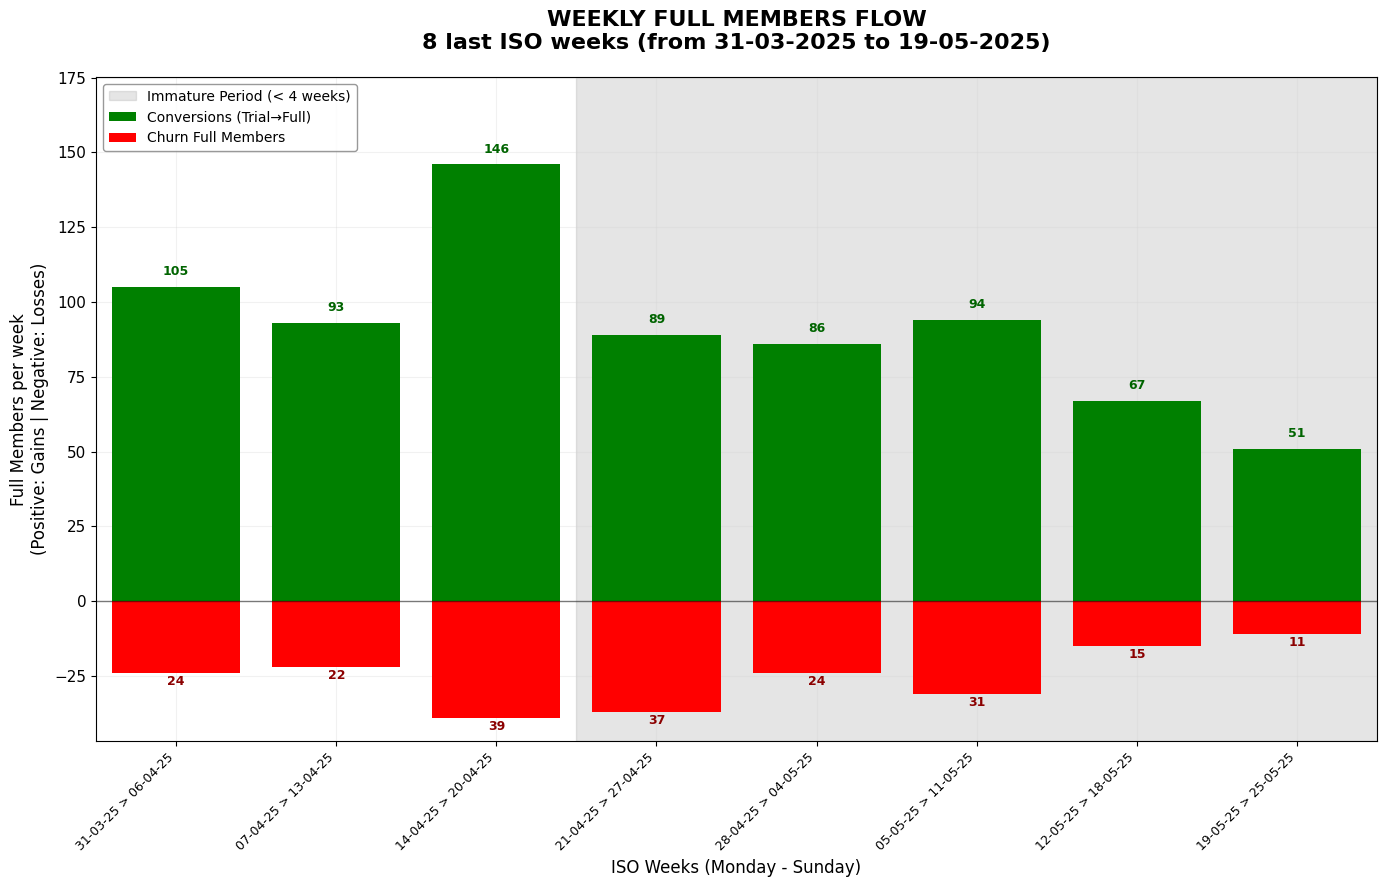

In [131]:
def weekly_flow_8_weeks(sub_df, today_date, today_iso, num_weeks=8):
    """
    Create a chart with weekly metrics for last N weeks (default 8) using standardized ISO calendar
    North: Conversions (Trial→Full)
    South: Churn full members
    Focus: Full members only (no renewals)

    REFACTORED to use standardized ISO week functions and fix hybrid calculation issues
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    # Obtenir les données de renouvellement (pour cohérence avec weekly_flow_all_time)
    renewal_dict = cus_renewal(sub_df)
    trial_to_full_member_df = renewal_dict['trial_to_full_member_df']

    print(f"📊 Creating LAST {num_weeks} WEEKS flow analysis using standardized ISO calendar...")

    # === FONCTION HELPER POUR AJOUTER LES COLONNES ISO (Centralisée et standardisée) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filtrer les dates valides pour éviter les <NA>
        valid_dates = df[date_column].notna()

        # Initialiser les colonnes avec des valeurs par défaut
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculer seulement pour les dates valides
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df


    # Générer les N dernières semaines ISO correctement avec calculate_target_iso_week
    iso_weeks = []
    current_year, current_week = today_iso.year, today_iso.week

    for i in range(num_weeks):
        # Ajouter la semaine courante
        iso_week_key = f"{current_year}-W{current_week:02d}"
        iso_weeks.insert(0, iso_week_key)  # Insert au début pour ordre chronologique

        # Reculer d'une semaine ISO correctement
        current_week -= 1
        if current_week <= 0:
            current_year -= 1
            current_week = get_weeks_in_iso_year(current_year)

    print(f"📅 Analysis from {iso_weeks[0]} to {iso_weeks[-1]} ({len(iso_weeks)} ISO weeks)")

    # === PRÉPARER LES DATAFRAMES AVEC ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # Conversions (créations de comptes)
    conversion_customers = add_iso_week_columns(trial_to_full_member_df, 'refund_period_end_utc')

    # Churn (annulations)
    churn_customers = add_iso_week_columns(trial_to_full_member_df.copy(), 'canceled_at_utc')

    # === CALCULER LES MÉTRIQUES HEBDOMADAIRES ISO ===
    # Filtrer les données valides avant groupby
    weekly_conversions = conversion_customers[conversion_customers['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn = churn_customers[churn_customers['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === REINDEXER TOUTES LES SÉRIES À LA PLAGE DES N SEMAINES ===
    weekly_conversions = weekly_conversions.reindex(iso_weeks, fill_value=0)
    weekly_churn = weekly_churn.reindex(iso_weeks, fill_value=0)

    # === CRÉER LES LABELS DE SEMAINES AVEC VRAIES DATES (UTILISANT get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in iso_weeks:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # UTILISER LA FONCTION STANDARDISÉE get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(iso_weeks))

    # === CRÉER LE GRAPHIQUE - PÉRIODE COURTE ===
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # === BARPLOT POSITIF (NORD) ===
    ax.bar(x_pos, weekly_conversions, label='Conversions (Trial→Full)', color='green')

    # === BARPLOT NÉGATIF (SUD) ===
    ax.bar(x_pos, -weekly_churn, label='Churn Full Members', color='red')

    # === CONFIGURATION DES AXES ===
    ax.set_ylabel('Full Members per week\n(Positive: Gains | Negative: Losses)', fontsize=12)
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12)

    # === AJOUTER LES LABELS DE VALEURS (AMÉLIORÉ) ===
    for i, (conv, churn) in enumerate(zip(weekly_conversions, weekly_churn)):
        if conv > 0:
            # Protection contre les séries vides
            max_conv = max(weekly_conversions) if len(weekly_conversions) > 0 and max(weekly_conversions) > 0 else 1
            ax.text(i, conv + max_conv * 0.02, str(int(conv)),
                   ha='center', va='bottom', fontsize=9, color='darkgreen', fontweight='bold')

        if churn > 0:
            # Protection contre les séries vides
            max_churn = max(weekly_churn) if len(weekly_churn) > 0 and max(weekly_churn) > 0 else 1
            ax.text(i, -churn - max_churn * 0.02, str(int(churn)),
                   ha='center', va='top', fontsize=9, color='darkred', fontweight='bold')

    # === CONFIGURATION VISUELLE ===
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Ajuster les limites Y avec protection
    if len(weekly_conversions) > 0 and max(weekly_conversions) > 0:
        y_max = max(weekly_conversions) * 1.2
    else:
        y_max = 1

    if len(weekly_churn) > 0 and max(weekly_churn) > 0:
        y_min = -max(weekly_churn) * 1.2
    else:
        y_min = -1

    ax.set_ylim(y_min, y_max)

    # Configuration de l'axe X - montrer tous les labels pour les courtes périodes
    ax.set_xticks(x_pos)
    ax.set_xticklabels(week_labels, rotation=45, ha='right', fontsize=9)

    # === ZONE GRISE POUR LES PÉRIODES IMMATURES (UTILISANT calculate_target_iso_week) ===
    # Calculer la semaine de coupure immature (4 semaines avant pour conversions)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=4)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(iso_weeks):
        # Comparer les semaines ISO directement
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.5
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='gray',
                   label='Immature Period (< 4 weeks)', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITRES ET LÉGENDES ===
    if len(week_dates) > 0:
        start_date = week_dates[0].strftime("%d-%m-%Y")
        end_date = week_dates[-1].strftime("%d-%m-%Y")
        period_text = f'{num_weeks} last ISO weeks (from {start_date} to {end_date})'
    else:
        period_text = f'{num_weeks} last ISO weeks'

    ax.set_title(f'WEEKLY FULL MEMBERS FLOW\n{period_text}',
                 fontsize=16, fontweight='bold', pad=20)

    # Légendes
    lines1, labels1 = ax.get_legend_handles_labels()
    ax.legend(lines1, labels1, loc='best', fontsize=10)

    # === MÉTRIQUES RÉSUMÉES ===
    print("=== CALCULATING METRICS ===")

    total_conversions = weekly_conversions.sum()
    total_churn = weekly_churn.sum()
    net_growth = total_conversions - total_churn

    # Métriques additionnelles pour cohérence
    avg_conversions_per_week = total_conversions / num_weeks if num_weeks > 0 else 0
    avg_churn_per_week = total_churn / num_weeks if num_weeks > 0 else 0

    print(f"📈 Total conversions ({num_weeks} weeks): {total_conversions:,}")
    print(f"📉 Total churn ({num_weeks} weeks): {total_churn:,}")
    print(f"🎯 Net growth ({num_weeks} weeks): {net_growth:,}")
    print(f"📊 Avg conversions per week: {avg_conversions_per_week:.1f}")
    print(f"📊 Avg churn per week: {avg_churn_per_week:.1f}")

    plt.tight_layout()

    # === SAUVEGARDE ===
    filename = f"weekly_flow_{num_weeks}_weeks_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Short period chart saved: {filename}")
    plt.show()

    # === RETOUR ENRICHI ===
    return {
        'conversions': total_conversions,
        'churn': total_churn,
        'net_growth': net_growth,
        'num_weeks': num_weeks,
        'avg_conversions_per_week': avg_conversions_per_week,
        'avg_churn_per_week': avg_churn_per_week,
        'weekly_conversions': weekly_conversions,
        'weekly_churn': weekly_churn,
        'iso_weeks': iso_weeks,
        'week_dates': week_dates
    }


# === UTILISATION ===
metrics_8w = weekly_flow_8_weeks(sub_df, today_date, today_iso, num_weeks=8)

📊 Creating RENEWAL-FOCUSED analysis for last 8 ISO weeks using standardized functions...
📅 Analyzing ISO weeks: 2025-W14 to 2025-W21
🗓️  Adding ISO week columns...
📈 Calculating renewal metrics...
🔍 Immature cutoff at: 2025-W19
🔍 Immature period: 3 recent weeks

=== CALCULATING RENEWAL METRICS ===
📈 Total Y1→Y2 renewals (8 weeks): 229
📈 Total Y2→Y3 renewals (8 weeks): 0
📈 Total renewals (8 weeks): 229
📉 Total post-renewal churn (8 weeks): 39
📉 Total refund churn (8 weeks): 31
📉 Total churn (8 weeks): 70
🎯 Net renewal growth (8 weeks): 159
📊 Avg renewals per week: 28.6
📊 Avg churn per week: 8.8
📊 Renewal churn rate: 30.6%
📁 Renewal flow chart saved: weekly_renewal_flow_8_weeks_2025-05-23.png


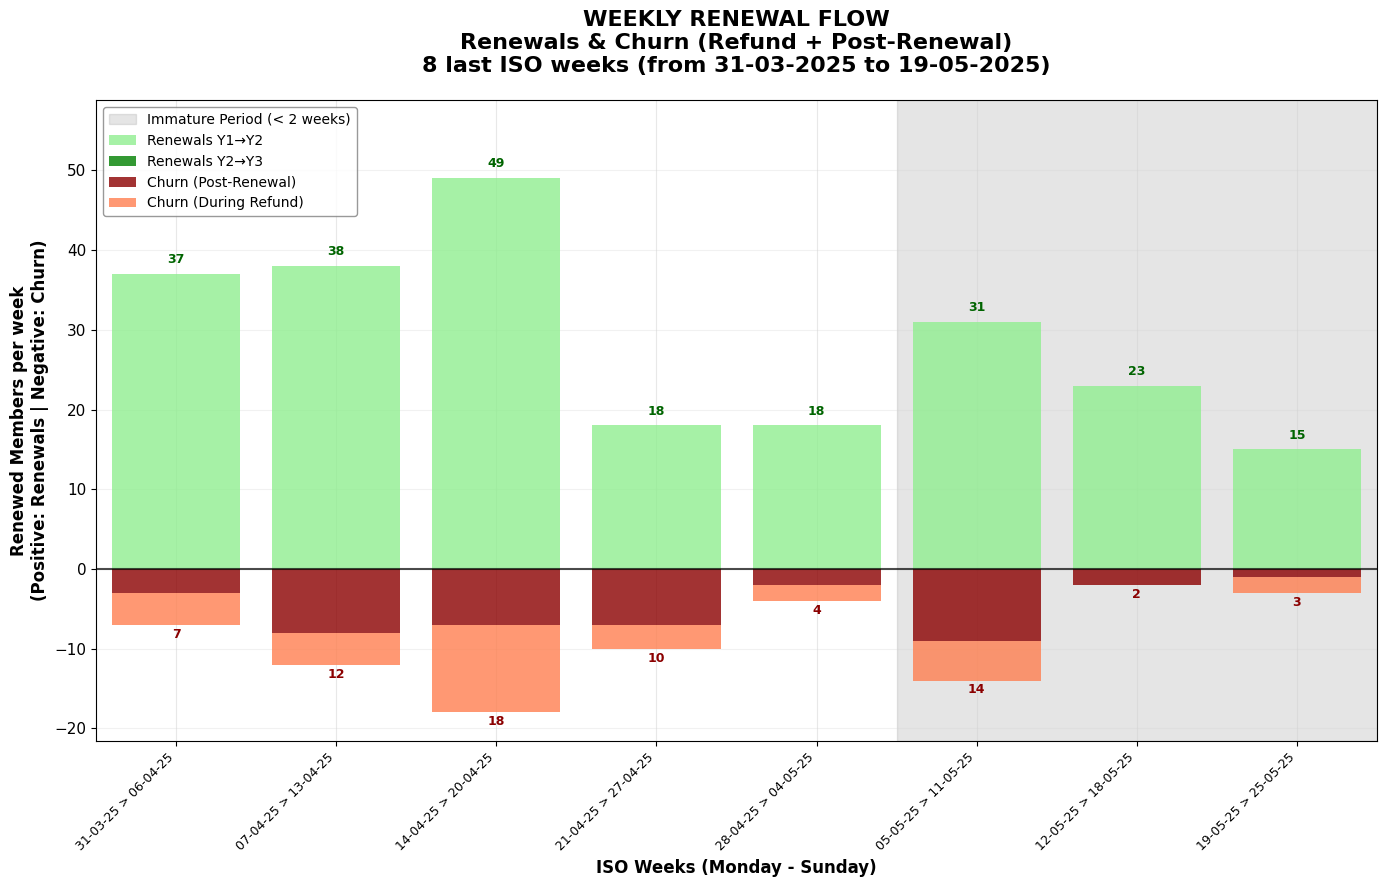

In [132]:
def weekly_renewal_flow_8_weeks(sub_df, today_date, today_iso, num_weeks=8):
    """
    Create a chart with weekly renewal metrics for last N weeks using standardized ISO calendar
    FOCUS: Renewals only (Y1→Y2, Y2→Y3) and churn during refund + churn AFTER renewals
    North: Y1→Y2 Renewals + Y2→Y3 Renewals (stacked)
    South: Churn of renewed members only

    REFACTORED to use standardized ISO week functions
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    # Obtenir les données de renouvellement
    renewal_dict = cus_renewal(sub_df)

    renewed_to_y2_df = renewal_dict['renewed_to_y2_df']  # Customers qui ont renouvelé en Y2
    renewed_to_y3_df = renewal_dict['renewed_to_y3_df']  # Customers qui ont renouvelé en Y3
    customers_in_y2 = renewal_dict['customer_in_y2_df']
    customers_in_y3 = renewal_dict['customer_in_y3_df']

    print(f"📊 Creating RENEWAL-FOCUSED analysis for last {num_weeks} ISO weeks using standardized functions...")

    # === FONCTION HELPER POUR AJOUTER COLONNES ISO (Centralisée et standardisée) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filtrer les dates valides pour éviter les <NA>
        valid_dates = df[date_column].notna()

        # Initialiser les colonnes avec des valeurs par défaut
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculer seulement pour les dates valides
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df


    # Générer les N dernières semaines ISO correctement avec les fonctions standardisées
    iso_week_keys = []
    current_year, current_week = today_iso.year, today_iso.week

    for i in range(num_weeks):
        # Ajouter la semaine courante
        iso_week_key = f"{current_year}-W{current_week:02d}"
        iso_week_keys.insert(0, iso_week_key)  # Insert au début pour ordre chronologique

        # Reculer d'une semaine ISO correctement avec get_weeks_in_iso_year
        current_week -= 1
        if current_week <= 0:
            current_year -= 1
            current_week = get_weeks_in_iso_year(current_year)

    print(f"📅 Analyzing ISO weeks: {iso_week_keys[0]} to {iso_week_keys[-1]}")

    # === PRÉPARER LES DATAFRAMES AVEC ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # RENEWALS: Moment où ils deviennent des renewed members (fin de refund period)
    y1_to_y2_renewals = add_iso_week_columns(renewed_to_y2_df.copy(), 'refund_period_end_utc')
    y2_to_y3_renewals = add_iso_week_columns(renewed_to_y3_df.copy(), 'refund_period_end_utc')

    # CHURN: Seulement les renewed members qui ont ensuite churned
    # Pour Y2 renewals qui ont churned
    churn_after_y2_renewal = renewed_to_y2_df[renewed_to_y2_df['canceled_at_utc'].notna()].copy()
    churn_after_y2_renewal = add_iso_week_columns(churn_after_y2_renewal, 'canceled_at_utc')

    # Pour Y3 renewals qui ont churned
    churn_after_y3_renewal = renewed_to_y3_df[renewed_to_y3_df['canceled_at_utc'].notna()].copy()
    churn_after_y3_renewal = add_iso_week_columns(churn_after_y3_renewal, 'canceled_at_utc')

    # Pour Y2 Churn During refund period
    churn_during_y2_renewal = customers_in_y2[
        (customers_in_y2['canceled_at_utc'].notna()) &
        (customers_in_y2['canceled_during_refund_period'])
    ].copy()
    churn_during_y2_renewal = add_iso_week_columns(churn_during_y2_renewal, 'canceled_at_utc')

    # Pour Y3 Churn During refund period
    churn_during_y3_renewal = customers_in_y3[
        (customers_in_y3['canceled_at_utc'].notna()) &
        (customers_in_y3['canceled_during_refund_period'])
    ].copy()
    churn_during_y3_renewal = add_iso_week_columns(churn_during_y3_renewal, 'canceled_at_utc')

    # === CALCULER LES MÉTRIQUES HEBDOMADAIRES ISO ===
    print("📈 Calculating renewal metrics...")

    # RENEWALS (gains)
    weekly_renewals_y1_to_y2 = y1_to_y2_renewals[y1_to_y2_renewals['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_renewals_y2_to_y3 = y2_to_y3_renewals[y2_to_y3_renewals['iso_week_key'].notna()].groupby('iso_week_key').size()

    # CHURN post-renewal (losses)
    weekly_churn_post_y2 = churn_after_y2_renewal[churn_after_y2_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn_post_y3 = churn_after_y3_renewal[churn_after_y3_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()

    # CHURN during refund period (losses)
    weekly_churn_refund_y2 = churn_during_y2_renewal[churn_during_y2_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn_refund_y3 = churn_during_y3_renewal[churn_during_y3_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === REINDEXER TOUTES LES SÉRIES À LA PLAGE COMPLÈTE ===
    weekly_renewals_y1_to_y2 = weekly_renewals_y1_to_y2.reindex(iso_week_keys, fill_value=0)
    weekly_renewals_y2_to_y3 = weekly_renewals_y2_to_y3.reindex(iso_week_keys, fill_value=0)
    weekly_churn_post_y2 = weekly_churn_post_y2.reindex(iso_week_keys, fill_value=0)
    weekly_churn_post_y3 = weekly_churn_post_y3.reindex(iso_week_keys, fill_value=0)
    weekly_churn_refund_y2 = weekly_churn_refund_y2.reindex(iso_week_keys, fill_value=0)
    weekly_churn_refund_y3 = weekly_churn_refund_y3.reindex(iso_week_keys, fill_value=0)

    # Combiner le churn total
    weekly_total_churn_post_renewal = weekly_churn_post_y2 + weekly_churn_post_y3
    weekly_total_churn_refund_renewal = weekly_churn_refund_y2 + weekly_churn_refund_y3

    # === CRÉER LES LABELS DE SEMAINES AVEC VRAIES DATES (UTILISANT get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in iso_week_keys:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # UTILISER LA FONCTION STANDARDISÉE get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(iso_week_keys))

    # === CRÉER LE GRAPHIQUE - RENEWAL FOCUS SHORT PERIOD ===
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # === BARPLOT POSITIF (NORD) - RENEWALS ===
    bars_pos_1 = ax.bar(x_pos, weekly_renewals_y1_to_y2,
                        label='Renewals Y1→Y2', color='lightgreen', alpha=0.8)
    bars_pos_2 = ax.bar(x_pos, weekly_renewals_y2_to_y3,
                        bottom=weekly_renewals_y1_to_y2,
                        label='Renewals Y2→Y3', color='green', alpha=0.8)

    # === BARPLOT NÉGATIF (SUD) - CHURN EMPILÉ ===
    bars_neg_1 = ax.bar(x_pos, -weekly_total_churn_post_renewal,
                        label='Churn (Post-Renewal)', color='darkred', alpha=0.8)

    bars_neg_2 = ax.bar(x_pos, -weekly_total_churn_refund_renewal,
                        bottom=-weekly_total_churn_post_renewal,  # Empiler en dessous
                        label='Churn (During Refund)', color='coral', alpha=0.8)

    # === CONFIGURATION DES AXES ===
    ax.set_ylabel('Renewed Members per week\n(Positive: Renewals | Negative: Churn)',
                  fontsize=12, fontweight='bold')
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12, fontweight='bold')

    # === AJOUTER LES LABELS DE VALEURS (AMÉLIORÉ AVEC PROTECTION) ===
    for i, (ren1, ren2, churn1, churn2) in enumerate(zip(
        weekly_renewals_y1_to_y2, weekly_renewals_y2_to_y3,
        weekly_total_churn_post_renewal, weekly_total_churn_refund_renewal)):

        # Gains (en haut)
        total_renewals = ren1 + ren2
        if total_renewals > 0:
            # Protection contre les séries vides
            max_positive = max(weekly_renewals_y1_to_y2 + weekly_renewals_y2_to_y3) if len(weekly_renewals_y1_to_y2) > 0 else 1
            ax.text(i, total_renewals + max_positive * 0.02, str(int(total_renewals)),
                   ha='center', va='bottom', fontsize=9, color='darkgreen', fontweight='bold')

        # Pertes (en bas) - Total empilé
        total_churn = churn1 + churn2
        if total_churn > 0:
            # Protection améliorée pour éviter les erreurs de calcul
            max_churn = max(weekly_total_churn_post_renewal + weekly_total_churn_refund_renewal) if len(weekly_total_churn_post_renewal) > 0 else 1
            ax.text(i, -(churn1 + churn2) - max_churn * 0.02, str(int(total_churn)),
                   ha='center', va='top', fontsize=9, color='darkred', fontweight='bold')

    # === CONFIGURATION VISUELLE ===
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Ajuster les limites Y avec protection
    max_positive = max(weekly_renewals_y1_to_y2 + weekly_renewals_y2_to_y3) if len(weekly_renewals_y1_to_y2) > 0 else 1
    max_negative = max(weekly_total_churn_post_renewal + weekly_total_churn_refund_renewal) if len(weekly_total_churn_post_renewal) > 0 else 0

    y_max = max_positive * 1.2
    y_min = -max_negative * 1.2 if max_negative > 0 else -1
    ax.set_ylim(y_min, y_max)

    # Configuration de l'axe X - montrer tous les labels pour les courtes périodes
    ax.set_xticks(x_pos)
    ax.set_xticklabels(week_labels, rotation=45, ha='right', fontsize=9)

    # === ZONE GRISE POUR LES PÉRIODES IMMATURES (UTILISANT calculate_target_iso_week) ===
    # Calculer la semaine de coupure immature (2 semaines avant pour renewals)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=2)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(iso_week_keys):
        # Comparer les semaines ISO directement
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.5
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='gray',
                   label='Immature Period (< 2 weeks)', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITRES ET LÉGENDES ===
    start_date = week_dates[0].strftime("%d-%m-%Y") if week_dates else "N/A"
    end_date = week_dates[-1].strftime("%d-%m-%Y") if week_dates else "N/A"
    period_text = f'{num_weeks} last ISO weeks (from {start_date} to {end_date})'

    ax.set_title(f'WEEKLY RENEWAL FLOW\nRenewals & Churn (Refund + Post-Renewal)\n{period_text}',
                 fontsize=16, fontweight='bold', pad=20)

    # Légendes
    ax.legend(loc='best', fontsize=10)

    # === MÉTRIQUES RÉSUMÉES ===
    print("\n=== CALCULATING RENEWAL METRICS ===")

    total_y1_to_y2 = weekly_renewals_y1_to_y2.sum()
    total_y2_to_y3 = weekly_renewals_y2_to_y3.sum()
    total_churn_post_renewal = weekly_total_churn_post_renewal.sum()
    total_churn_refund_renewal = weekly_total_churn_refund_renewal.sum()

    # Calculs de métriques dérivées
    total_renewals = total_y1_to_y2 + total_y2_to_y3
    total_churn = total_churn_post_renewal + total_churn_refund_renewal
    net_renewals = total_renewals - total_churn

    # Moyennes hebdomadaires
    avg_renewals_per_week = total_renewals / num_weeks if num_weeks > 0 else 0
    avg_churn_per_week = total_churn / num_weeks if num_weeks > 0 else 0

    print(f"📈 Total Y1→Y2 renewals ({num_weeks} weeks): {total_y1_to_y2:,}")
    print(f"📈 Total Y2→Y3 renewals ({num_weeks} weeks): {total_y2_to_y3:,}")
    print(f"📈 Total renewals ({num_weeks} weeks): {total_renewals:,}")
    print(f"📉 Total post-renewal churn ({num_weeks} weeks): {total_churn_post_renewal:,}")
    print(f"📉 Total refund churn ({num_weeks} weeks): {total_churn_refund_renewal:,}")
    print(f"📉 Total churn ({num_weeks} weeks): {total_churn:,}")
    print(f"🎯 Net renewal growth ({num_weeks} weeks): {net_renewals:,}")
    print(f"📊 Avg renewals per week: {avg_renewals_per_week:.1f}")
    print(f"📊 Avg churn per week: {avg_churn_per_week:.1f}")

    # Taux de churn
    churn_rate = 0
    if total_renewals > 0:
        churn_rate = (total_churn / total_renewals * 100)
        print(f"📊 Renewal churn rate: {churn_rate:.1f}%")

    plt.tight_layout()

    # === SAUVEGARDE ===
    filename = f"weekly_renewal_flow_{num_weeks}_weeks_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Renewal flow chart saved: {filename}")
    plt.show()

    # === RETOUR ENRICHI ===
    return {
        'renewals_y1_to_y2': total_y1_to_y2,
        'renewals_y2_to_y3': total_y2_to_y3,
        'total_renewals': total_renewals,
        'churn_post_renewal': total_churn_post_renewal,
        'churn_refund_renewal': total_churn_refund_renewal,
        'total_churn': total_churn,
        'net_renewals': net_renewals,
        'churn_rate': churn_rate,
        'num_weeks': num_weeks,
        'avg_renewals_per_week': avg_renewals_per_week,
        'avg_churn_per_week': avg_churn_per_week,
        'weekly_renewals_y1_to_y2': weekly_renewals_y1_to_y2,
        'weekly_renewals_y2_to_y3': weekly_renewals_y2_to_y3,
        'weekly_churn_post_renewal': weekly_total_churn_post_renewal,
        'weekly_churn_refund_renewal': weekly_total_churn_refund_renewal,
        'iso_week_keys': iso_week_keys,
        'week_labels': week_labels,
        'week_dates': week_dates
    }


# === UTILISATION ===
renewal_metrics_8w = weekly_renewal_flow_8_weeks(sub_df, today_date, today_iso, num_weeks=8)

📊 Creating ALL TIME weekly trials analysis using standardized ISO calendar...
Analysis since first date: 25-09-2023
🗓️  Adding ISO week columns...
📅 Analysis from 2023-W39 to 2025-W21 (87 ISO weeks)
🔍 Immature cutoff at: 2025-W21
🔍 Immature period: 1 recent weeks
=== CALCULATING METRICS ===
📈 Total trials (all time): 17,805
📊 Average per week: 204.7
📊 Maximum week: 761
📊 Minimum week: 69
📊 Number of weeks analyzed: 87
Latest week: 70 trials
Previous week: 110 trials
📊 Week-over-week change: -40 (-36.4%)
📁 All time chart saved: weekly_trials_all_time_2025-05-23.png


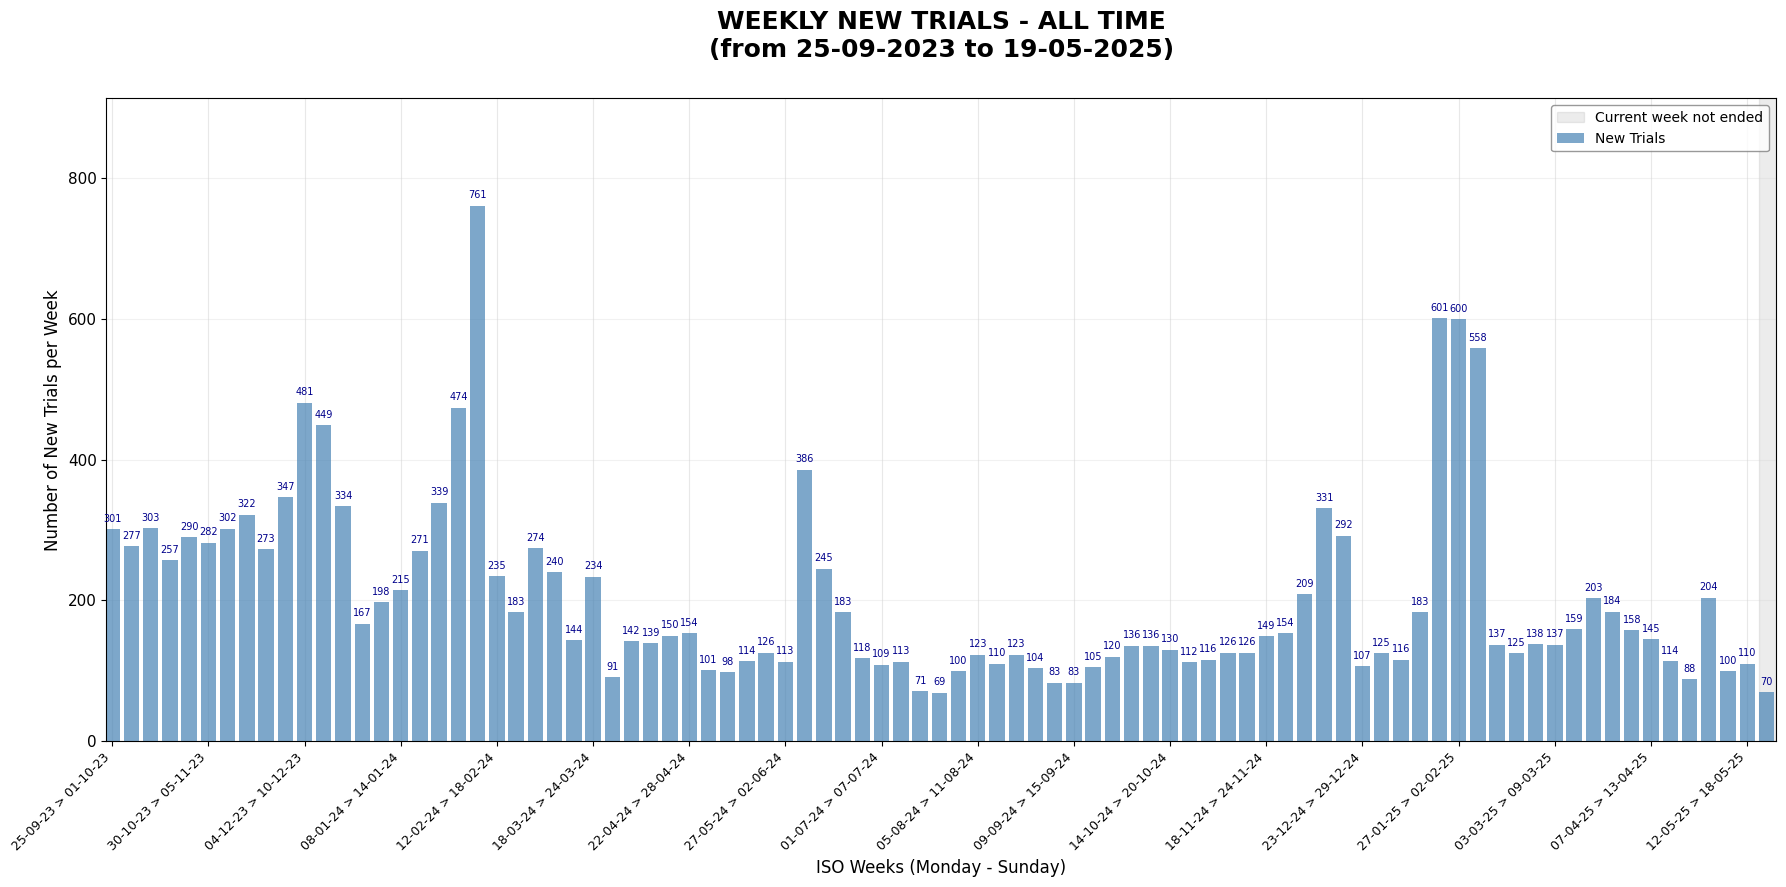

In [133]:
def plot_weekly_trials_all_time(sub_df, today_date, today_iso):
    """
    Plot the number of new trials each week since the beginning using standardized ISO calendar
    REFACTORED to use standardized ISO week functions instead of Pandas Grouper
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    # Vérifier s'il y a des données
    if 'trial_start_utc' not in sub_df.columns or sub_df['trial_start_utc'].isna().all():
        print("❌ No trial data found")
        return {}

    first_date = sub_df['trial_start_utc'].min()
    if pd.isna(first_date):
        print("❌ No trial data found")
        return {}

    print(f"📊 Creating ALL TIME weekly trials analysis using standardized ISO calendar...")
    print(f"Analysis since first date: {first_date.strftime('%d-%m-%Y')}")

    # === FONCTION HELPER POUR AJOUTER COLONNES ISO (Centralisée et standardisée) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filtrer les dates valides pour éviter les <NA>
        valid_dates = df[date_column].notna()

        # Initialiser les colonnes avec des valeurs par défaut
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculer seulement pour les dates valides
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # === PRÉPARER LES DATAFRAMES AVEC ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # Ajouter les colonnes ISO au DataFrame des trials
    trials_with_iso = add_iso_week_columns(sub_df, 'trial_start_utc')

    # === CALCULER LES MÉTRIQUES HEBDOMADAIRES ISO ===
    # Grouper par semaine ISO au lieu de Pandas Grouper
    weekly_trials = trials_with_iso[trials_with_iso['iso_week_key'].notna()].groupby('iso_week_key').size()

    # Vérifier s'il y a des données après groupement
    if len(weekly_trials) == 0:
        print("❌ No trial data found after ISO grouping")
        return {}

    # === DÉTERMINER LA PLAGE COMPLÈTE DES SEMAINES ISO ===
    all_iso_weeks = weekly_trials.index.tolist()

    # === UTILISER LA FONCTION DE TRI ISO STANDARDISÉE ===
    def sort_iso_weeks(week_keys):
        """Sort ISO week keys using standardized parsing"""
        def parse_week(week_key):
            try:
                if pd.isna(week_key) or week_key == '<NA>' or not isinstance(week_key, str):
                    return (0, 0)
                year, week = week_key.split('-W')
                return (int(year), int(week))
            except (ValueError, AttributeError):
                print(f"⚠️  Invalid week key ignored: {week_key}")
                return (0, 0)

        valid_weeks = [week for week in week_keys
                      if pd.notna(week) and week != '<NA>' and isinstance(week, str) and '-W' in str(week)]
        return sorted(valid_weeks, key=parse_week)

    sorted_iso_weeks = sort_iso_weeks(all_iso_weeks)

    if not sorted_iso_weeks:
        print("❌ No valid ISO weeks after filtering")
        return {}

    # Obtenir les dates de début et fin pour affichage
    first_week_key = sorted_iso_weeks[0]
    last_week_key = sorted_iso_weeks[-1]
    num_weeks = len(sorted_iso_weeks)

    print(f"📅 Analysis from {first_week_key} to {last_week_key} ({num_weeks} ISO weeks)")

    # === REINDEXER LA SÉRIE À LA PLAGE COMPLÈTE ===
    weekly_trials = weekly_trials.reindex(sorted_iso_weeks, fill_value=0)

    # === CRÉER LES LABELS DE SEMAINES AVEC VRAIES DATES (UTILISANT get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in sorted_iso_weeks:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # UTILISER LA FONCTION STANDARDISÉE get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(sorted_iso_weeks))

    # === CREATE CHART - ALL TIME ===
    fig, ax = plt.subplots(1, 1, figsize=(18, 9))

    # === BARPLOT ===
    bars = ax.bar(x_pos, weekly_trials, label='New Trials',
                  color='steelblue', alpha=0.7)

    # Ajouter les chiffres sur les barres avec protection
    for i, v in enumerate(weekly_trials):
        if v > 0:
            max_trials = max(weekly_trials) if len(weekly_trials) > 0 and max(weekly_trials) > 0 else 1
            ax.text(i, v + max_trials * 0.01, str(int(v)),
                   ha='center', va='bottom', fontsize=7, color='darkblue')

    # === AXIS CONFIGURATION ===
    ax.set_ylabel('Number of New Trials per Week', fontsize=12)
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12)

    # === VISUAL CONFIGURATION ===
    ax.grid(True, alpha=0.3, axis='y')

    # Ajuster les limites Y avec protection
    if len(weekly_trials) > 0 and max(weekly_trials) > 0:
        y_max = max(weekly_trials) * 1.2
        ax.set_ylim(0, y_max)
    else:
        ax.set_ylim(0, 1)

    ax.set_xlim(-0.3, len(x_pos) - 0.5)

    # Configuration de l'axe X - réduire les labels pour les longues périodes
    step = max(1, len(x_pos) // 15)
    ax.set_xticks(x_pos[::step])
    ax.set_xticklabels([week_labels[i] for i in x_pos[::step]],
                       rotation=45, ha='right', fontsize=9)


    # Calculer la semaine de coupure immature (1 semaine avant pour trials - plus récent)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=0)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(sorted_iso_weeks):
        # Comparer les semaines ISO directement
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.15, color='gray',
                   label='Current week not ended', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITLES AND LEGENDS ===
    start_date = week_dates[0].strftime("%d-%m-%Y") if week_dates else "N/A"
    end_date = week_dates[-1].strftime("%d-%m-%Y") if week_dates else "N/A"
    period_text = f'(from {start_date} to {end_date})'
    ax.set_title(f'WEEKLY NEW TRIALS - ALL TIME\n{period_text}',
                 fontsize=18, fontweight='bold', pad=30)

    ax.legend(loc='upper right', fontsize=10)

    # === SUMMARY METRICS ===
    print("=== CALCULATING METRICS ===")

    total_trials = weekly_trials.sum()
    avg_trials = weekly_trials.mean()
    max_trials_value = weekly_trials.max()
    min_trials_value = weekly_trials.min()

    # Métriques additionnelles
    if len(weekly_trials) >= 2:
        latest_week = weekly_trials.iloc[-1]
        previous_week = weekly_trials.iloc[-2]
        latest_week_text = f"Latest week: {latest_week:,} trials\nPrevious week: {previous_week:,} trials"
        week_over_week_change = latest_week - previous_week
        week_over_week_pct = (week_over_week_change / previous_week * 100) if previous_week > 0 else 0
    else:
        latest_week = weekly_trials.iloc[-1] if len(weekly_trials) > 0 else 0
        latest_week_text = f"Latest week: {latest_week:,} trials\nPrevious week: N/A"
        week_over_week_change = 0
        week_over_week_pct = 0

    print(f"📈 Total trials (all time): {total_trials:,}")
    print(f"📊 Average per week: {avg_trials:.1f}")
    print(f"📊 Maximum week: {max_trials_value:,}")
    print(f"📊 Minimum week: {min_trials_value:,}")
    print(f"📊 Number of weeks analyzed: {num_weeks:,}")
    print(latest_week_text)
    if len(weekly_trials) >= 2:
        print(f"📊 Week-over-week change: {week_over_week_change:+,} ({week_over_week_pct:+.1f}%)")

    plt.tight_layout()

    # === SAVE ===
    filename = f"weekly_trials_all_time_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')

    print(f"📁 All time chart saved: {filename}")
    plt.show()

    # === RETOUR ENRICHI ===
    return {
        'total_trials': total_trials,
        'average_per_week': avg_trials,
        'max_week': max_trials_value,
        'min_week': min_trials_value,
        'latest_week': latest_week,
        'previous_week': previous_week if len(weekly_trials) >= 2 else 0,
        'week_over_week_change': week_over_week_change,
        'week_over_week_pct': week_over_week_pct,
        'num_weeks': num_weeks,
        'weekly_data': weekly_trials.tolist(),
        'weekly_trials_series': weekly_trials,
        'iso_weeks': sorted_iso_weeks,
        'week_dates': week_dates,
        'first_week_key': first_week_key,
        'last_week_key': last_week_key
    }


# Utilisation
trials_metrics_all = plot_weekly_trials_all_time(sub_df, today_date, today_iso)

📊 Creating LAST 8 WEEKS trials analysis using standardized ISO calendar...
📅 Analysis from 2025-W14 to 2025-W21 (8 ISO weeks)
🗓️  Adding ISO week columns...
🔍 Immature cutoff at: 2025-W21
🔍 Immature period: 1 recent weeks
=== CALCULATING METRICS ===
📈 Total trials (8 weeks): 989
📊 Average per week: 123.6
📊 Recent 4-week average: 121.0
📊 Maximum week: 204
📊 Minimum week: 70
Latest week: 70 trials
Previous week: 110 trials
📊 Week-over-week change: -40 (-36.4%)
📁 Short period chart saved: weekly_trials_8_weeks_2025-05-23.png


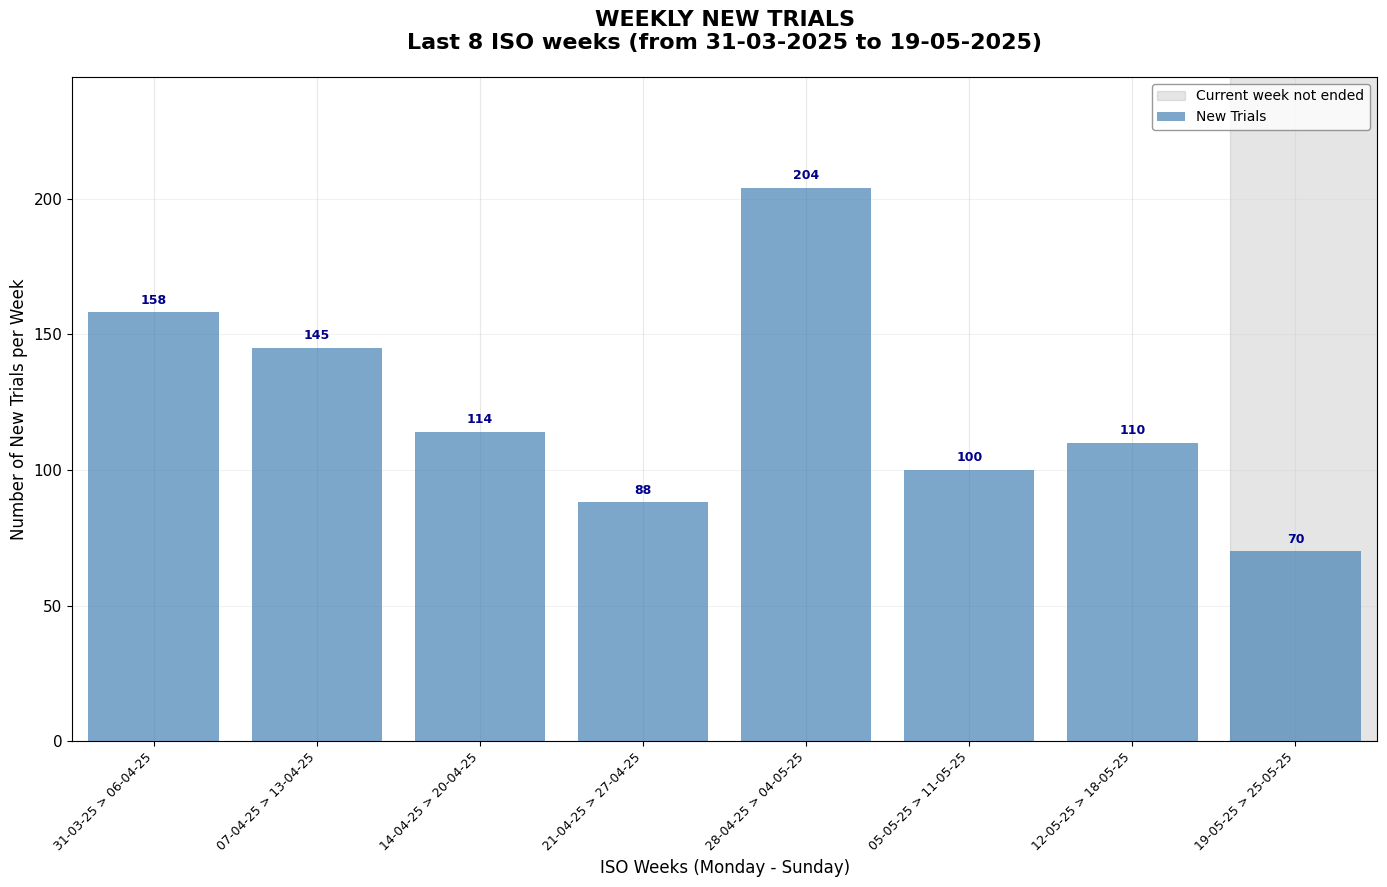

In [134]:
def plot_weekly_trials_8_weeks(sub_df, today_date, today_iso, num_weeks=8):
    """
    Plot the number of new trials each week for the last N weeks (default 8) using standardized ISO calendar
    REFACTORED to use standardized ISO week functions instead of Pandas Grouper
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    print(f"📊 Creating LAST {num_weeks} WEEKS trials analysis using standardized ISO calendar...")

    # Vérifier s'il y a des données
    if 'trial_start_utc' not in sub_df.columns or sub_df['trial_start_utc'].isna().all():
        print("❌ No trial data found")
        return {}

    # === FONCTION HELPER POUR AJOUTER COLONNES ISO (Centralisée et standardisée) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filtrer les dates valides pour éviter les <NA>
        valid_dates = df[date_column].notna()

        # Initialiser les colonnes avec des valeurs par défaut
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculer seulement pour les dates valides
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df


    # Générer les N dernières semaines ISO correctement avec les fonctions standardisées
    iso_week_keys = []
    current_year, current_week = today_iso.year, today_iso.week

    for i in range(num_weeks):
        # Ajouter la semaine courante
        iso_week_key = f"{current_year}-W{current_week:02d}"
        iso_week_keys.insert(0, iso_week_key)  # Insert au début pour ordre chronologique

        # Reculer d'une semaine ISO correctement avec get_weeks_in_iso_year
        current_week -= 1
        if current_week <= 0:
            current_year -= 1
            current_week = get_weeks_in_iso_year(current_year)

    print(f"📅 Analysis from {iso_week_keys[0]} to {iso_week_keys[-1]} ({len(iso_week_keys)} ISO weeks)")

    # === PRÉPARER LES DATAFRAMES AVEC ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # Ajouter les colonnes ISO au DataFrame des trials
    trials_with_iso = add_iso_week_columns(sub_df, 'trial_start_utc')

    # === CALCULER LES MÉTRIQUES HEBDOMADAIRES ISO ===
    # Grouper par semaine ISO au lieu de Pandas Grouper
    weekly_trials = trials_with_iso[trials_with_iso['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === REINDEXER À LA PLAGE DES N SEMAINES ===
    weekly_trials = weekly_trials.reindex(iso_week_keys, fill_value=0)

    # === CRÉER LES LABELS DE SEMAINES AVEC VRAIES DATES (UTILISANT get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in iso_week_keys:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # UTILISER LA FONCTION STANDARDISÉE get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(iso_week_keys))

    # === CREATE CHART - SHORT PERIOD ===
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # === BARPLOT ===
    bars = ax.bar(x_pos, weekly_trials, label='New Trials',
                  color='steelblue', alpha=0.7)

    # Ajouter les chiffres sur les barres avec protection
    for i, v in enumerate(weekly_trials):
        if v > 0:
            # Protection contre les séries vides
            max_trials = max(weekly_trials) if len(weekly_trials) > 0 and max(weekly_trials) > 0 else 1
            ax.text(i, v + max_trials * 0.01, str(int(v)),
                   ha='center', va='bottom', fontsize=9, color='darkblue', fontweight='bold')

    # === AXIS CONFIGURATION ===
    ax.set_ylabel('Number of New Trials per Week', fontsize=12)
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12)

    # === VISUAL CONFIGURATION ===
    ax.grid(True, alpha=0.3, axis='y')

    # Ajuster les limites Y avec protection
    if len(weekly_trials) > 0 and max(weekly_trials) > 0:
        y_max = max(weekly_trials) * 1.2
        ax.set_ylim(0, y_max)
    else:
        ax.set_ylim(0, 1)

    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Configuration de l'axe X - montrer tous les labels pour les courtes périodes
    ax.set_xticks(x_pos)
    ax.set_xticklabels(week_labels, rotation=45, ha='right', fontsize=9)

    # === ZONE GRISE POUR LES PÉRIODES IMMATURES (UTILISANT calculate_target_iso_week) ===
    # Calculer la semaine de coupure immature (1 semaine avant pour trials - plus récent)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=0)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(iso_week_keys):
        # Comparer les semaines ISO directement
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='gray',
                   label='Current week not ended', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITLES AND LEGENDS ===
    if len(week_dates) > 0:
        start_date = week_dates[0].strftime("%d-%m-%Y")
        end_date = week_dates[-1].strftime("%d-%m-%Y")
        period_text = f'Last {num_weeks} ISO weeks (from {start_date} to {end_date})'
    else:
        period_text = f'Last {num_weeks} ISO weeks'

    ax.set_title(f'WEEKLY NEW TRIALS\n{period_text}',
                 fontsize=16, fontweight='bold', pad=20)

    ax.legend(loc='upper right', fontsize=10)

    # === SUMMARY METRICS ===
    print("=== CALCULATING METRICS ===")

    total_trials = weekly_trials.sum()
    avg_trials = weekly_trials.mean()
    max_trials_value = weekly_trials.max()
    min_trials_value = weekly_trials.min()

    # Métriques additionnelles
    if len(weekly_trials) >= 2:
        latest_week = weekly_trials.iloc[-1]
        previous_week = weekly_trials.iloc[-2]
        latest_week_text = f"Latest week: {latest_week:,} trials\nPrevious week: {previous_week:,} trials"
        week_over_week_change = latest_week - previous_week
        week_over_week_pct = (week_over_week_change / previous_week * 100) if previous_week > 0 else 0
    else:
        latest_week = weekly_trials.iloc[-1] if len(weekly_trials) > 0 else 0
        previous_week = 0
        latest_week_text = f"Latest week: {latest_week:,} trials\nPrevious week: N/A"
        week_over_week_change = 0
        week_over_week_pct = 0

    # Métriques de tendance
    if num_weeks >= 4:
        # Moyenne des 4 dernières semaines
        recent_4w_avg = weekly_trials.iloc[-4:].mean()
        print(f"📈 Total trials ({num_weeks} weeks): {total_trials:,}")
        print(f"📊 Average per week: {avg_trials:.1f}")
        print(f"📊 Recent 4-week average: {recent_4w_avg:.1f}")
    else:
        print(f"📈 Total trials ({num_weeks} weeks): {total_trials:,}")
        print(f"📊 Average per week: {avg_trials:.1f}")

    print(f"📊 Maximum week: {max_trials_value:,}")
    print(f"📊 Minimum week: {min_trials_value:,}")
    print(latest_week_text)

    if len(weekly_trials) >= 2:
        print(f"📊 Week-over-week change: {week_over_week_change:+,} ({week_over_week_pct:+.1f}%)")

    plt.tight_layout()

    # === SAVE ===
    filename = f"weekly_trials_{num_weeks}_weeks_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')

    print(f"📁 Short period chart saved: {filename}")
    plt.show()

    # === RETOUR ENRICHI ===
    return {
        'total_trials': total_trials,
        'average_per_week': avg_trials,
        'max_week': max_trials_value,
        'min_week': min_trials_value,
        'latest_week': latest_week,
        'previous_week': previous_week,
        'week_over_week_change': week_over_week_change,
        'week_over_week_pct': week_over_week_pct,
        'num_weeks': num_weeks,
        'weekly_data': weekly_trials.tolist(),
        'weekly_trials_series': weekly_trials,
        'iso_week_keys': iso_week_keys,
        'week_labels': week_labels,
        'week_dates': week_dates
    }


# Utilisation
trials_metrics_8w = plot_weekly_trials_8_weeks(sub_df, today_date, today_iso, num_weeks=8)

In [135]:
    # columns_to_keep = [
    #     'id', 'Customer Name', 'Customer ID', 'Status', 'Cancellation Reason',
    #     'Created (UTC)', 'Start (UTC)', 'Current Period Start (UTC)',
    #     'Current Period End (UTC)', 'Trial Start (UTC)', 'Trial End (UTC)',
    #     'Canceled At (UTC)', 'Ended At (UTC)', 'senderShopifyCustomerId (metadata)'

sub_raw

,id,Customer ID,Customer Description,Customer Name,Plan,Product,Product ID,Quantity,Currency,Cancellation Reason,Interval,Amount,Status,Created (UTC),Start (UTC),Start Date (UTC),Current Period Start (UTC),Current Period End (UTC),Trial Start (UTC),Trial End (UTC),Application Fee Percent,Coupon,Tax Percent,Canceled At (UTC),Cancel At Period End,Ended At (UTC),Exclusive Tax Rate,Inclusive Tax Rate,Automatic Tax Enabled,Tax Location Recognized,kind (metadata),senderShopifyCustomerId (metadata),shopifyCustomerId (metadata),previousEndDate (metadata)
0,sub_1RRroXCZ9aYYH5wiZ6516k4Y,cus_SMb0NMrlhzvojr,NaN,Customer1,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,year,69,trialing,2025-05-23 9:22,2025-05-23 9:22,2025-05-23 9:22,2025-05-23 9:22,2025-06-02 9:22,2025-05-23 9:22,2025-06-02 9:22,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
1,sub_1RRrh0CZ9aYYH5wi9ZOMIpda,cus_SMas6YsqkS3FUn,NaN,Customer2,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,year,69,trialing,2025-05-23 9:15,2025-05-23 9:15,2025-05-23 9:15,2025-05-23 9:15,2025-06-02 9:15,2025-05-23 9:15,2025-06-02 9:15,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN
2,sub_1RRrQKCZ9aYYH5wi0meZ9Lx4,cus_SMab6nDMynXbYk,NaN,Customer3,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,year,69,trialing,2025-05-23 8:57,2025-05-23 8:57,2025-05-23 8:57,2025-05-23 8:57,2025-06-02 8:57,2025-05-23 8:57,2025-06-02 8:57,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
3,sub_1RRr1jCZ9aYYH5wiAtbMDHul,cus_SMaCh3diB5702c,NaN,Customer4,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,year,69,trialing,2025-05-23 8:32,2025-05-23 8:32,2025-05-23 8:32,2025-05-23 8:32,2025-06-02 8:32,2025-05-23 8:32,2025-06-02 8:32,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
4,sub_1RRpnzCZ9aYYH5wiSxvnsPjH,cus_SMYvL9t7buzWC9,NaN,Customer5,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,year,69,trialing,2025-05-23 7:14,2025-05-23 7:14,2025-05-23 7:14,2025-05-23 7:14,2025-06-02 7:14,2025-05-23 7:14,2025-06-02 7:14,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20438,sub_1NuB6ZCZ9aYYH5wihozzj3Bv,cus_OhaH3sQTOqvuAH,NaN,Customer13370,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,year,69,canceled,2023-09-25 9:29,2023-09-25 9:29,2023-09-25 9:29,2023-09-25 9:29,2023-10-25 9:29,2023-09-25 9:29,2023-10-25 9:29,NaN,NaN,NaN,2023-09-25 9:38,False,2023-09-25 9:38,NaN,NaN,False,False,NaN,NaN,NaN,NaN
20439,sub_1NuAzbCZ9aYYH5wiSHh7j7Fs,cus_Oha922cf4488T3,NaN,Customer13370,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,year,69,canceled,2023-09-25 9:22,2023-09-25 9:22,2023-09-25 9:22,2023-09-25 9:22,2023-10-25 9:22,2023-09-25 9:22,2023-10-25 9:22,NaN,NaN,NaN,2023-09-25 9:25,False,2023-09-25 9:25,NaN,NaN,False,False,NaN,NaN,NaN,NaN
20440,sub_1NuAjVCZ9aYYH5wilo3J9SX0,cus_OhZtIUk5q419NR,NaN,Customer13370,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,year,69,canceled,2023-09-25 9:05,2023-09-25 9:05,2023-09-25 9:05,2023-09-25 9:05,2023-10-25 9:05,2023-09-25 9:05,2023-10-25 9:05,NaN,NaN,NaN,2023-09-25 9:25,False,2023-09-25 9:25,NaN,NaN,False,False,NaN,NaN,NaN,NaN
20441,sub_1NuAiUCZ9aYYH5wi6g4k5dIz,cus_OhZs6NtQ3RSc9j,NaN,Customer8878,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,year,69,canceled,2023-09-25 9:04,2023-09-25 9:04,2023-09-25 9:04,2023-09-25 9:04,2023-10-25 9:04,2023-09-25 9:04,2023-10-25 9:04,NaN,NaN,NaN,2023-09-25 9:25,False,2023-09-25 9:25,NaN,NaN,False,True,NaN,NaN,NaN,NaN


📊 Creating cohort conversion funnel using standardized ISO calendar...
🎯 Target cohort week: 2025-W18
📅 Analyzing cohort from 28-04-2025 to 04-05-2025
✅ Found 204 trials in cohort week 2025-W18
=== CALCULATING METRICS ===
📊 Cohort week: 2025-W18
📈 Total trials: 204
📊 Trial survival rate: 79.4%
📊 Full conversion rate: 30.4%
📊 Trial→Refund survival rate: 38.3%
📉 Drop-off during trial: 20.6%
📉 Drop-off during refund: 49.0%
📉 Total drop-off: 69.6%
📁 Cohort conversion funnel saved: conversion_funnel_cohort_2025-W18_2025-05-23.png


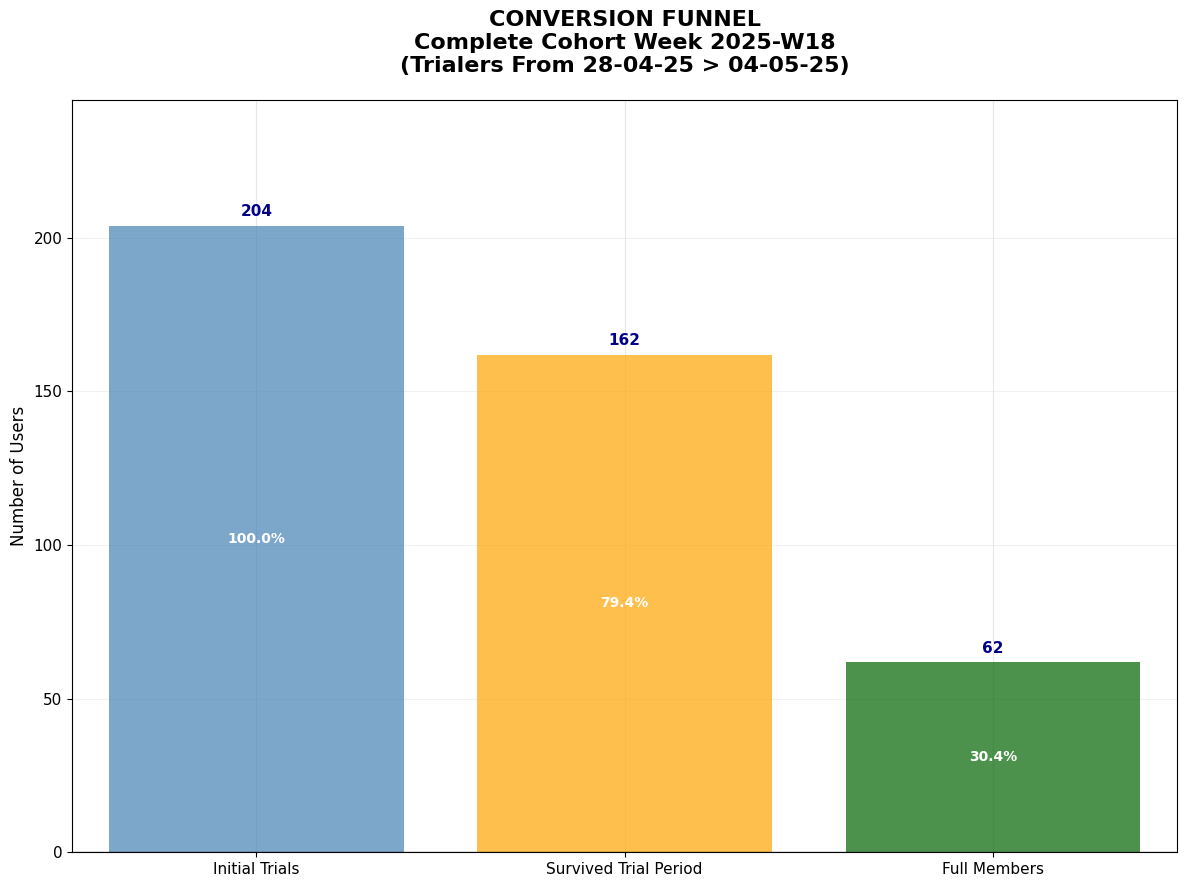

In [136]:
def plot_cohort_conversion_funnel(sub_df, today_date, today_iso):
    """
    Plot a conversion funnel for different cohorts with 3 bars:
    1. Initial trials
    2. Survivors after trial period (not canceled during trial)
    3. Survivors after refund period (not canceled during refund)

    REFACTORED to use standardized ISO week functions instead of Pandas date calculations
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    print("📊 Creating cohort conversion funnel using standardized ISO calendar...")

    # Vérifier s'il y a des données
    if 'trial_start_utc' not in sub_df.columns or sub_df['trial_start_utc'].isna().all():
        print("❌ No trial data found")
        return {}


    # Calculer la semaine de cohorte (4 semaines avant pour avoir une cohorte complète)
    weeks_back = 3
    cohort_year, cohort_week, cohort_week_key = calculate_target_iso_week(today_iso, weeks_back)

    print(f"🎯 Target cohort week: {cohort_week_key}")

    # === UTILISER get_iso_week_bounds POUR OBTENIR LES VRAIES BORNES ===
    try:
        cohort_monday, cohort_sunday = get_iso_week_bounds(cohort_year, cohort_week)

        # Convertir en UTC pour la comparaison
        cohort_monday_utc = pd.Timestamp(cohort_monday).tz_localize('UTC')
        cohort_sunday_utc = pd.Timestamp(cohort_sunday).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        print(f"📅 Analyzing cohort from {cohort_monday.strftime('%d-%m-%Y')} to {cohort_sunday.strftime('%d-%m-%Y')}")

    except Exception as e:
        print(f"❌ Error calculating ISO week bounds: {e}")
        return {}

    # === FONCTION HELPER POUR AJOUTER COLONNES ISO (optionnel pour validation) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filtrer les dates valides pour éviter les <NA>
        valid_dates = df[date_column].notna()

        # Initialiser les colonnes avec des valeurs par défaut
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculer seulement pour les dates valides
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # === FILTRER LES TRIALS DE LA COHORTE AVEC LES BORNES ISO EXACTES ===
    # Option 1: Filtrage direct avec les bornes calculées
    complete_cohort_trials = sub_df[
        (sub_df['trial_start_utc'] >= cohort_monday_utc) &
        (sub_df['trial_start_utc'] <= cohort_sunday_utc)
    ].copy()

    # Option 2: Validation avec ISO week key (optionnel pour debug)
    if len(complete_cohort_trials) > 0:
        trials_with_iso = add_iso_week_columns(complete_cohort_trials, 'trial_start_utc')
        iso_validation = trials_with_iso[trials_with_iso['iso_week_key'] == cohort_week_key]

        if len(iso_validation) != len(complete_cohort_trials):
            print(f"⚠️  Validation warning: Direct filter ({len(complete_cohort_trials)}) vs ISO filter ({len(iso_validation)})")
            # Utiliser la méthode ISO pour plus de précision
            complete_cohort_trials = iso_validation

    if len(complete_cohort_trials) == 0:
        print(f"❌ No trial data found for cohort week {cohort_week_key}")
        return {}

    print(f"✅ Found {len(complete_cohort_trials)} trials in cohort week {cohort_week_key}")

    # === CALCULER LE FUNNEL POUR LA COHORTE COMPLÈTE ===
    total_trials = len(complete_cohort_trials)

    # Survivors après la période d'essai (pas annulé pendant l'essai)
    survivors_trial = len(complete_cohort_trials[
        ~complete_cohort_trials['canceled_during_trial']
    ])

    # Survivors après la période de remboursement (pas annulé pendant remboursement)
    survivors_refund = len(complete_cohort_trials[
        (~complete_cohort_trials['canceled_during_trial']) &
        (~complete_cohort_trials['canceled_during_refund_period'])
    ])

    # === CREATE CHART (même style que les autres fonctions) ===
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    categories = ['Initial Trials', 'Survived Trial Period', 'Full Members']
    values = [total_trials, survivors_trial, survivors_refund]
    colors = ['steelblue', 'orange', 'darkgreen']  # Couleurs harmonisées avec les autres graphiques

    bars = ax.bar(categories, values, color=colors, alpha=0.7)

    # Ajouter les chiffres sur les barres (même style que les autres fonctions)
    for i, (bar, value) in enumerate(zip(bars, values)):
        height = bar.get_height()
        # Protection contre max() sur liste vide
        max_val = max(values) if values else 1
        ax.text(bar.get_x() + bar.get_width()/2., height + max_val * 0.01,
                f'{value:,}', ha='center', va='bottom',
                fontsize=11, color='darkblue', fontweight='bold')

        # Ajouter le pourcentage de l'étape précédente
        if total_trials > 0:
            percentage = (value / total_trials) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                    f'{percentage:.1f}%', ha='center', va='center',
                    fontweight='bold', fontsize=10, color='white')

    # === TITLES AND CONFIGURATION (utilisant les vraies dates ISO) ===
    week_label = f"{cohort_monday.strftime('%d-%m-%y')} > {cohort_sunday.strftime('%d-%m-%y')}"
    ax.set_title(f'CONVERSION FUNNEL\nComplete Cohort Week {cohort_week_key}\n(Trialers From {week_label})',
                 fontsize=16, fontweight='bold', pad=20)

    ax.set_ylabel('Number of Users', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

    # Protection contre max() sur liste vide
    max_val = max(values) if values else 1
    ax.set_ylim(0, max_val * 1.2)

    # === VISUAL CONFIGURATION (même style que les autres fonctions) ===
    ax.set_xlim(-0.5, len(categories) - 0.5)

    # === SUMMARY METRICS ===
    print("=== CALCULATING METRICS ===")

    conversion_trial = (survivors_trial / total_trials * 100) if total_trials > 0 else 0
    conversion_refund = (survivors_refund / total_trials * 100) if total_trials > 0 else 0
    drop_off_trial = ((total_trials - survivors_trial) / total_trials * 100) if total_trials > 0 else 0
    drop_off_refund = ((survivors_trial - survivors_refund) / total_trials * 100) if total_trials > 0 else 0

    # Métriques additionnelles
    survival_rate_trial_to_refund = (survivors_refund / survivors_trial * 100) if survivors_trial > 0 else 0

    print(f"📊 Cohort week: {cohort_week_key}")
    print(f"📈 Total trials: {total_trials:,}")
    print(f"📊 Trial survival rate: {conversion_trial:.1f}%")
    print(f"📊 Full conversion rate: {conversion_refund:.1f}%")
    print(f"📊 Trial→Refund survival rate: {survival_rate_trial_to_refund:.1f}%")
    print(f"📉 Drop-off during trial: {drop_off_trial:.1f}%")
    print(f"📉 Drop-off during refund: {drop_off_refund:.1f}%")
    print(f"📉 Total drop-off: {100 - conversion_refund:.1f}%")

    # Ajouter une ligne de séparation comme dans les autres fonctions
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

    plt.tight_layout()

    # === SAVE (utilisant la clé ISO au lieu du format Pandas) ===
    filename = f"conversion_funnel_cohort_{cohort_week_key}_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Cohort conversion funnel saved: {filename}")
    plt.show()

    # === RETURN DATA (enrichi avec données ISO) ===
    return {
        'total_trials': total_trials,
        'survived_trial': survivors_trial,
        'survived_refund': survivors_refund,
        'conversion_trial_rate': conversion_trial,
        'conversion_refund_rate': conversion_refund,
        'survival_rate_trial_to_refund': survival_rate_trial_to_refund,
        'drop_off_trial': drop_off_trial,
        'drop_off_refund': drop_off_refund,
        'total_drop_off': 100 - conversion_refund,
        'cohort_week_start': cohort_monday,
        'cohort_week_end': cohort_sunday,
        'cohort_week_label': week_label,
        'cohort_week_key': cohort_week_key,
        'cohort_year': cohort_year,
        'cohort_week_number': cohort_week,
        'weeks_back': weeks_back
    }


# Utilisation
last_cohort_dict = plot_cohort_conversion_funnel(sub_df, today_date, today_iso)

📊 Creating cohort conversion funnel comparison using standardized ISO calendar...
✅ Using ISO cohort data: 2025-W18
=== CALCULATING COMPARISON COHORTS WITH ISO FUNCTIONS ===
📅 Previous cohort: 2025-W17 (21-04-2025 to 27-04-2025)
📅 6-month period: 2024-W45 to 2025-W17
📅 All-time period: 2023-09-25 to 2025-04-27 (82.9 weeks)
=== CALCULATING COMPARISON METRICS ===
📊 Last cohort (2025-W18): 30.4%
📊 Previous cohort (2025-W17): 34.1%
📊 6-month average: 39.3%
📊 All-time average: 37.7%
📁 Conversion funnel comparison saved: conversion_funnel_comparison_2025-W18_2025-05-23.png


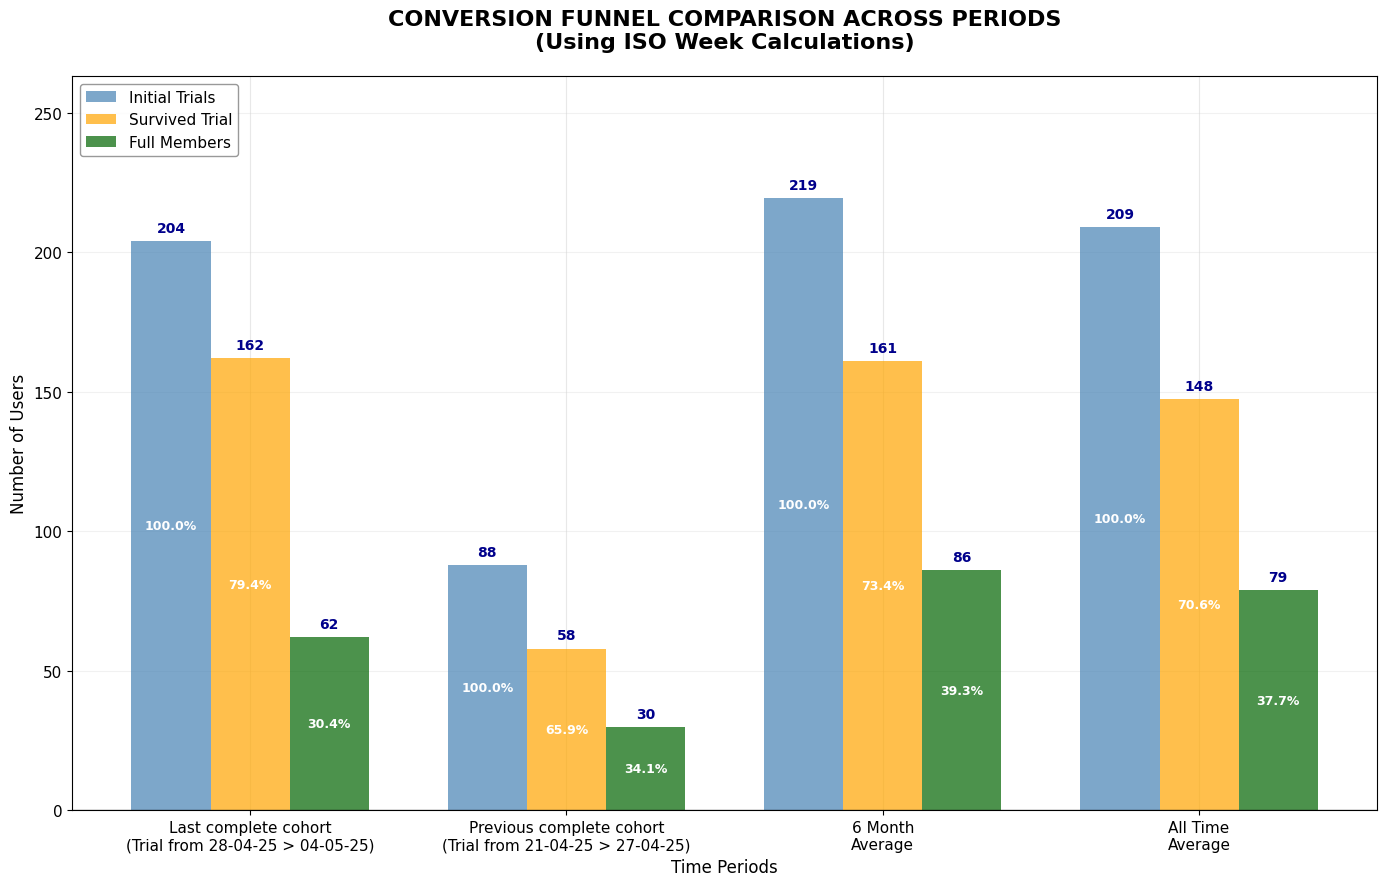

In [137]:
def plot_cohort_conversion_funnel_comparison(sub_df, today_date, today_iso, last_cohort_dict):
    """
    Plot a conversion funnel comparing different cohorts with 3 bars:
    1. Initial trials
    2. Survivors after trial period (not canceled during trial)
    3. Survivors after refund period (not canceled during refund)

    REFACTORED to use standardized ISO week functions instead of Pandas calculations
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    print("📊 Creating cohort conversion funnel comparison using standardized ISO calendar...")

    # Vérifier s'il y a des données
    if 'trial_start_utc' not in sub_df.columns or sub_df['trial_start_utc'].isna().all():
        print("❌ No trial data found")
        return {}

    # === RÉCUPÉRER LES DONNÉES DE LA DERNIÈRE COHORTE ===
    last_total_trials = last_cohort_dict['total_trials']
    last_survived_trial = last_cohort_dict['survived_trial']
    last_survived_refund = last_cohort_dict['survived_refund']
    last_conversion_trial_rate = last_cohort_dict['conversion_trial_rate']
    last_conversion_refund_rate = last_cohort_dict['conversion_refund_rate']
    last_total_drop_off = last_cohort_dict['total_drop_off']

    # Utiliser les données ISO de la cohorte depuis le dictionnaire harmonisé
    if 'cohort_week_key' in last_cohort_dict:
        # Nouveau format avec données ISO
        complete_cohort_start = last_cohort_dict['cohort_week_start']
        complete_cohort_end = last_cohort_dict['cohort_week_end']
        complete_cohort_label = last_cohort_dict['cohort_week_label']
        complete_cohort_key = last_cohort_dict['cohort_week_key']
        print(f"✅ Using ISO cohort data: {complete_cohort_key}")
    else:
        # Fallback pour ancien format
        complete_cohort_start = last_cohort_dict['cohort_week_start']
        complete_cohort_end = last_cohort_dict['cohort_week_end']
        complete_cohort_label = last_cohort_dict['cohort_week_label']
        complete_cohort_key = "Unknown"
        print("⚠️  Using legacy cohort data format")

    print("=== CALCULATING COMPARISON COHORTS WITH ISO FUNCTIONS ===")


    prev_weeks_back = 4

    try:
        prev_cohort_year, prev_cohort_week, prev_cohort_key = calculate_target_iso_week(today_iso, prev_weeks_back)
        prev_cohort_monday, prev_cohort_sunday = get_iso_week_bounds(prev_cohort_year, prev_cohort_week)

        # Conversion UTC pour comparaison
        prev_cohort_monday_utc = pd.Timestamp(prev_cohort_monday).tz_localize('UTC')
        prev_cohort_sunday_utc = pd.Timestamp(prev_cohort_sunday).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        print(f"📅 Previous cohort: {prev_cohort_key} ({prev_cohort_monday.strftime('%d-%m-%Y')} to {prev_cohort_sunday.strftime('%d-%m-%Y')})")

        prev_cohort_trials = sub_df[
            (sub_df['trial_start_utc'] >= prev_cohort_monday_utc) &
            (sub_df['trial_start_utc'] <= prev_cohort_sunday_utc)
        ]

        prev_total_trials = len(prev_cohort_trials)
        prev_survivors_trial = len(prev_cohort_trials[~prev_cohort_trials['canceled_during_trial']])
        prev_survivors_refund = len(prev_cohort_trials[
            (~prev_cohort_trials['canceled_during_trial']) &
            (~prev_cohort_trials['canceled_during_refund_period'])
        ])

    except Exception as e:
        print(f"❌ Error calculating previous cohort: {e}")
        prev_total_trials = prev_survivors_trial = prev_survivors_refund = 0
        prev_cohort_monday = prev_cohort_sunday = today_date
        prev_cohort_key = "Error"

    # === MOYENNE 6 MOIS - UTILISANT calculate_target_iso_week ===
    try:
        # Période de 6 mois (24 semaines) finissant il y a 4 semaines
        six_m_end_year, six_m_end_week, six_m_end_key = calculate_target_iso_week(today_iso, weeks_back=4)
        six_m_start_year, six_m_start_week, six_m_start_key = calculate_target_iso_week(today_iso, weeks_back=28)  # 4 + 24

        six_m_start_monday, _ = get_iso_week_bounds(six_m_start_year, six_m_start_week)
        _, six_m_end_sunday = get_iso_week_bounds(six_m_end_year, six_m_end_week)

        # Conversion UTC
        six_m_start_utc = pd.Timestamp(six_m_start_monday).tz_localize('UTC')
        six_m_end_utc = pd.Timestamp(six_m_end_sunday).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        print(f"📅 6-month period: {six_m_start_key} to {six_m_end_key}")

        six_m_cohort_trials = sub_df[
            (sub_df['trial_start_utc'] >= six_m_start_utc) &
            (sub_df['trial_start_utc'] <= six_m_end_utc)
        ]

        six_m_time_divider = 24  # 24 semaines
        six_m_total_trials = len(six_m_cohort_trials) / six_m_time_divider
        six_m_survivors_trial = len(six_m_cohort_trials[~six_m_cohort_trials['canceled_during_trial']]) / six_m_time_divider
        six_m_survivors_refund = len(six_m_cohort_trials[
            (~six_m_cohort_trials['canceled_during_trial']) &
            (~six_m_cohort_trials['canceled_during_refund_period'])
        ]) / six_m_time_divider

    except Exception as e:
        print(f"❌ Error calculating 6-month average: {e}")
        six_m_total_trials = six_m_survivors_trial = six_m_survivors_refund = 0

    # === MOYENNE ALL TIME - UTILISANT BORNES ISO ===
    try:
        all_time_cohort_start = sub_df['trial_start_utc'].min()

        # Utiliser la même borne de fin que 6 mois
        six_m_end_year, six_m_end_week, _ = calculate_target_iso_week(today_iso, weeks_back=4)
        _, all_time_cohort_end = get_iso_week_bounds(six_m_end_year, six_m_end_week)
        all_time_cohort_end_utc = pd.Timestamp(all_time_cohort_end).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        if pd.notna(all_time_cohort_start):
            # Calculer le diviseur en semaines ISO
            all_time_divider = (all_time_cohort_end_utc - all_time_cohort_start).days / 7

            all_time_cohort_trials = sub_df[
                (sub_df['trial_start_utc'] >= all_time_cohort_start) &
                (sub_df['trial_start_utc'] <= all_time_cohort_end_utc)
            ]

            all_time_total_trials = len(all_time_cohort_trials) / all_time_divider
            all_time_survivors_trial = len(all_time_cohort_trials[~all_time_cohort_trials['canceled_during_trial']]) / all_time_divider
            all_time_survivors_refund = len(all_time_cohort_trials[
                (~all_time_cohort_trials['canceled_during_trial']) &
                (~all_time_cohort_trials['canceled_during_refund_period'])
            ]) / all_time_divider

            print(f"📅 All-time period: {all_time_cohort_start.strftime('%Y-%m-%d')} to {all_time_cohort_end.strftime('%Y-%m-%d')} ({all_time_divider:.1f} weeks)")
        else:
            all_time_total_trials = all_time_survivors_trial = all_time_survivors_refund = 0

    except Exception as e:
        print(f"❌ Error calculating all-time average: {e}")
        all_time_total_trials = all_time_survivors_trial = all_time_survivors_refund = 0

    # === CRÉATION DU GRAPHIQUE (même style que les autres fonctions) ===
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # Préparation des données avec labels ISO
    prev_cohort_label = f"{prev_cohort_monday.strftime('%d-%m-%y')} > {prev_cohort_sunday.strftime('%d-%m-%y')}"

    periods = [
        f'Last complete cohort\n(Trial from {complete_cohort_label})',
        f'Previous complete cohort\n(Trial from {prev_cohort_label})',
        '6 Month\nAverage',
        'All Time\nAverage'
    ]

    initial_trials = [last_total_trials, prev_total_trials, six_m_total_trials, all_time_total_trials]
    survived_trial = [last_survived_trial, prev_survivors_trial, six_m_survivors_trial, all_time_survivors_trial]
    full_members = [last_survived_refund, prev_survivors_refund, six_m_survivors_refund, all_time_survivors_refund]

    # Positionnement des barres
    x = np.arange(len(periods))
    bar_width = 0.25

    # Couleurs harmonisées avec les autres fonctions
    colors = ['steelblue', 'orange', 'darkgreen']

    # Création des barres
    bars1 = ax.bar(x - bar_width, initial_trials, bar_width,
                   label='Initial Trials', color=colors[0], alpha=0.7)
    bars2 = ax.bar(x, survived_trial, bar_width,
                   label='Survived Trial', color=colors[1], alpha=0.7)
    bars3 = ax.bar(x + bar_width, full_members, bar_width,
                   label='Full Members', color=colors[2], alpha=0.7)

    # Ajouter les valeurs sur les barres avec protection
    def add_value_labels(bars, values):
        # Protection contre max() sur listes vides
        max_val = max(max(initial_trials) if initial_trials else [0],
                     max(survived_trial) if survived_trial else [0],
                     max(full_members) if full_members else [0])
        max_val = max_val if max_val > 0 else 1

        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + max_val * 0.01,
                    f'{value:.0f}', ha='center', va='bottom', fontweight='bold',
                    fontsize=10, color='darkblue')

    add_value_labels(bars1, initial_trials)
    add_value_labels(bars2, survived_trial)
    add_value_labels(bars3, full_members)

    # Ajouter les pourcentages dans les barres
    def add_percentage_labels(bars, values, base_values):
        for i, (bar, value, base) in enumerate(zip(bars, values, base_values)):
            if base > 0:
                percentage = (value / base) * 100
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height/2,
                        f'{percentage:.1f}%', ha='center', va='center',
                        fontweight='bold', fontsize=9, color='white')

    # Ajouter les pourcentages (tous relatifs aux trials initiaux)
    add_percentage_labels(bars1, initial_trials, initial_trials)  # 100% pour les trials initiaux
    add_percentage_labels(bars2, survived_trial, initial_trials)
    add_percentage_labels(bars3, full_members, initial_trials)

    # === CONFIGURATION DU GRAPHIQUE ===
    ax.set_xlabel('Time Periods', fontsize=12)
    ax.set_ylabel('Number of Users', fontsize=12)
    ax.set_title('CONVERSION FUNNEL COMPARISON ACROSS PERIODS\n(Using ISO Week Calculations)',
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(periods, fontsize=11)
    ax.legend(fontsize=11, loc='upper left')
    ax.grid(axis='y', alpha=0.3)

    # Définir les limites de l'axe Y avec protection
    all_values = initial_trials + survived_trial + full_members
    max_value = max(all_values) if all_values else 1
    if max_value > 0:
        ax.set_ylim(0, max_value * 1.2)

    # Ligne de séparation
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

    # === MÉTRIQUES RÉSUMÉES ===
    print("=== CALCULATING COMPARISON METRICS ===")

    last_conversion_rate = last_conversion_refund_rate
    prev_conversion_rate = (prev_survivors_refund / prev_total_trials * 100) if prev_total_trials > 0 else 0
    six_m_conversion_rate = (six_m_survivors_refund / six_m_total_trials * 100) if six_m_total_trials > 0 else 0
    all_time_conversion_rate = (all_time_survivors_refund / all_time_total_trials * 100) if all_time_total_trials > 0 else 0

    print(f"📊 Last cohort ({complete_cohort_key}): {last_conversion_rate:.1f}%")
    print(f"📊 Previous cohort ({prev_cohort_key}): {prev_conversion_rate:.1f}%")
    print(f"📊 6-month average: {six_m_conversion_rate:.1f}%")
    print(f"📊 All-time average: {all_time_conversion_rate:.1f}%")

    plt.tight_layout()

    # === SAUVEGARDE (utilisant clé ISO au lieu de format Pandas) ===
    if 'cohort_week_key' in last_cohort_dict:
        filename = f"conversion_funnel_comparison_{last_cohort_dict['cohort_week_key']}_{today_date.strftime('%Y-%m-%d')}.png"
    else:
        # Fallback pour ancien format
        cohort_week_str = complete_cohort_start.strftime('%Y-W%U')
        filename = f"conversion_funnel_comparison_{cohort_week_str}_{today_date.strftime('%Y-%m-%d')}.png"

    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Conversion funnel comparison saved: {filename}")
    plt.show()

    # === RETURN DATA ENRICHI ===
    cohort_dict = {
        'last_cohort': {
            'values': [last_total_trials, last_survived_trial, last_survived_refund],
            'conversion_rate': last_conversion_rate,
            'week_label': complete_cohort_label,
            'week_key': complete_cohort_key if 'cohort_week_key' in last_cohort_dict else "Unknown"
        },
        'prev_cohort': {
            'values': [prev_total_trials, prev_survivors_trial, prev_survivors_refund],
            'conversion_rate': prev_conversion_rate,
            'week_label': prev_cohort_label,
            'week_key': prev_cohort_key if 'prev_cohort_key' in locals() else "Unknown"
        },
        'six_month_avg': {
            'values': [six_m_total_trials, six_m_survivors_trial, six_m_survivors_refund],
            'conversion_rate': six_m_conversion_rate,
            'period_start_key': six_m_start_key if 'six_m_start_key' in locals() else "Unknown",
            'period_end_key': six_m_end_key if 'six_m_end_key' in locals() else "Unknown"
        },
        'all_time_avg': {
            'values': [all_time_total_trials, all_time_survivors_trial, all_time_survivors_refund],
            'conversion_rate': all_time_conversion_rate
        }
    }

    return cohort_dict


# Utilisation
last_cohort_comparison = plot_cohort_conversion_funnel_comparison(sub_df, today_date, today_iso, last_cohort_dict)

In [138]:
from reportlab.lib.pagesizes import A3, landscape
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import cm
from reportlab.lib import colors
from reportlab.lib.enums import TA_CENTER, TA_LEFT
import glob


def create_analysis_report_pdf(today_date, today_iso, analysis_dir='analysis'):
    """
    Create a comprehensive PDF report page by page
    Uses harmonized function naming conventions and file patterns
    """

    print("=== GENERATING PDF REPORT ===")

    # === PDF CONFIGURATION (harmonisé avec les autres fonctions) ===
    # Utiliser la même méthode de calcul de semaine que les autres fonctions
    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back=1)
    last_week_monday, last_week_sunday = get_iso_week_bounds(target_year, target_week)
    week_label = f"{last_week_monday.strftime('%d-%m-%y')} > {last_week_sunday.strftime('%d-%m-%y')}"



    pdf_filename = f'ANALYSIS_REPORT_{today_date.strftime("%Y-%m-%d")}.pdf'
    pdf_path = os.path.join(analysis_dir, pdf_filename)

    # Create PDF document in LANDSCAPE A3
    doc = SimpleDocTemplate(
        pdf_path,
        pagesize=landscape(A3),
        rightMargin=1*cm,
        leftMargin=1*cm,
        topMargin=1*cm,
        bottomMargin=1*cm
    )

    # === STYLES ===
    styles = getSampleStyleSheet()

    # Main title style
    title_style = ParagraphStyle(
        'CustomTitle',
        parent=styles['Heading1'],
        fontSize=36,
        spaceAfter=20,
        alignment=TA_CENTER,
        textColor=colors.black
    )

    # Subtitle style
    subtitle_style = ParagraphStyle(
        'CustomSubtitle',
        parent=styles['Heading2'],
        fontSize=24,
        spaceAfter=20,
        alignment=TA_CENTER,
        textColor=colors.black
    )

    small_subtitle_style = ParagraphStyle(
        'CustomSubtitle',
        parent=styles['Normal'],
        fontSize=18,
        spaceAfter=20,
        alignment=TA_CENTER,
        textColor=colors.black
    )

    # Section style
    section_style = ParagraphStyle(
        'SectionHeading',
        parent=styles['Heading2'],
        fontSize=20,
        spaceAfter=20,
        textColor=colors.darkblue
    )

    # Normal text styles
    normal_style = ParagraphStyle(
        'CustomNormal',
        parent=styles['Normal'],
        fontSize=18,
        spaceAfter=15,
        alignment=TA_LEFT
    )

    big_style = ParagraphStyle(
        'CustomNormal',
        parent=styles['Normal'],
        fontSize=22,
        spaceAfter=15,
        alignment=TA_LEFT
    )

    # Style for important metrics
    metrics_style = ParagraphStyle(
        'MetricsStyle',
        parent=styles['Normal'],
        fontSize=18,
        spaceAfter=12,
        textColor=colors.darkgreen,
        leftIndent=20
    )

    # === HELPER FUNCTION FOR CENTERED IMAGES ===
    def create_centered_image(image_path, width, height, title):
        """Create a centered image with title"""
        elements = []

        # Section title
        elements.append(Paragraph(title, subtitle_style))
        elements.append(Spacer(1, 0.8*cm))

        # Centered image in table
        centered_image = Image(image_path, width=width, height=height)
        image_table = Table([[centered_image]], colWidths=[40*cm])
        image_table.setStyle(TableStyle([
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
            ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ]))

        elements.append(image_table)
        return elements

    # === HELPER FUNCTION TO FIND LATEST FILES (harmonisé) ===
    def find_latest_chart(pattern):
        """Find the latest chart file matching the harmonized naming pattern"""
        try:
            files = glob.glob(os.path.join(analysis_dir, pattern))
            if files:
                return max(files, key=os.path.getctime)
            return None
        except Exception as e:
            print(f"❌ Error finding chart {pattern}: {e}")
            return None

    # === PDF CONTENT ===
    story = []

    # ============================================================================
    # === PAGE 1: TITLE PAGE ===
    # ============================================================================
    story.append(Spacer(1, 3*cm))
    story.append(Paragraph("DISHPATCH WEEKLY ANALYSIS REPORT", title_style))
    story.append(Paragraph(f"{today_date.strftime('%B %d, %Y')}", subtitle_style))
    story.append(Paragraph(f"(Last week completed: {week_label})", small_subtitle_style))
    story.append(Spacer(1, 1*cm))

    # Executive summary on title page
    story.append(Paragraph("EXECUTIVE SUMMARY", section_style))

    story.append(Paragraph(f"Currently Active full member ever: <b>{renewal_dict['all_active_full_member']}</b>", big_style))
    story.append(Paragraph(f"<i>Active Full Member 1st year: <b>{renewal_dict['active_in_y1']}</b> - 2nd year: <b>{renewal_dict['active_in_y2']}</b> - 3rd year: <b>{renewal_dict['active_in_y3']}</b></i>", normal_style))
    story.append(Spacer(1, 0.5*cm))

    story.append(Paragraph(f"Conversion Rate (from Trial to Full Member): <b>{renewal_dict['conversion_rate']}%</b>", big_style))
    story.append(Paragraph(f"<i>To be a full member a user must complete their trial, not request a refund, and not be gifted. (refund period {REFUND_PERIOD_DAYS} days)</i>", normal_style))
    story.append(Spacer(1, 0.5*cm))

    story.append(Paragraph(f"Renewal Rate: <b>{renewal_dict['renewal_rate_y1_to_y2']}%</b>", big_style))
    story.append(Paragraph(f"<i>Renewal rate from 1st year to 2nd year <b>{renewal_dict['renewal_rate_y1_to_y2']}%</b> from 2nd year to 3rd year <b>{renewal_dict['renewal_rate_y2_to_y3']}%.</b></i>", normal_style))
    story.append(Paragraph(f"<i>Ask for refund at the begining of 2nd Year <b>{renewal_dict['refund_during_y2']} - {renewal_dict['refund_rate_y2']}%</b> from 2nd year to 3rd year <b>{renewal_dict['refund_during_y3']} - {renewal_dict['refund_rate_y3']}%</b></i>", normal_style))
    story.append(Spacer(1, 0.5*cm))

    story.append(Paragraph(f"New trial last week: <b>{new_trial_last_week['trials_count']}</b><i> (previous week: {new_trial_prev_week['trials_count']})</i>", big_style))
    story.append(Paragraph(f"New full member last week: <b>{last_week_new_full_member['count']}</b><i> (previous week: {prev_week_new_full_member['count']})</i>", big_style))
    story.append(Paragraph(f"Churn full member last week: <b>{last_week_churned_members['count']}</b><i> (previous week: {prev_week_churned_members['count']})</i>", big_style))
    story.append(Spacer(1, 0.5*cm))




    story.append(PageBreak())

    # ============================================================================
    # === PAGE 2: Trial 8 weeks (harmonized naming) ===
    # ============================================================================
    latest_trial_8w = find_latest_chart("weekly_trials_8_weeks_*.png")
    if latest_trial_8w:
        story.extend(create_centered_image(latest_trial_8w, 28*cm, 18*cm, "WEEKLY NEW TRIALS 8 LAST WEEKS"))
    else:
        story.append(Paragraph("WEEKLY NEW TRIALS - 8 WEEKS", subtitle_style))
        story.append(Paragraph("[8 WEEKS TRIAL CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 3: Trial All Time (harmonized naming) ===
    # ============================================================================
    latest_trial_all = find_latest_chart("weekly_trials_all_time_*.png")
    if latest_trial_all:
        story.extend(create_centered_image(latest_trial_all, 36*cm, 18*cm, "WEEKLY NEW TRIALS - ALL TIME"))
    else:
        story.append(Paragraph("WEEKLY NEW TRIALS - ALL TIME", subtitle_style))
        story.append(Paragraph("[ALL TIME TRIAL CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 4: Full Member Flow 8 weeks (harmonized naming) ===
    # ============================================================================
    latest_flow_8w = find_latest_chart("weekly_flow_8_weeks_*.png")
    if latest_flow_8w:
        story.extend(create_centered_image(latest_flow_8w, 28*cm, 18*cm, "WEEKLY FULL MEMBERS FLOW LAST 8 WEEKS"))
    else:
        story.append(Paragraph("WEEKLY FULL MEMBERS FLOW - 8 WEEKS", subtitle_style))
        story.append(Paragraph("[8 WEEKS FLOW CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 5: Full Member Flow All Time (harmonized naming) ===
    # ============================================================================
    latest_flow_all = find_latest_chart("weekly_flow_all_time_*.png")
    if latest_flow_all:
        story.extend(create_centered_image(latest_flow_all, 36*cm, 18*cm, "WEEKLY FULL MEMBERS FLOW - ALL TIME"))
    else:
        story.append(Paragraph("WEEKLY FULL MEMBERS FLOW - ALL TIME", subtitle_style))
        story.append(Paragraph("[ALL TIME FLOW CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 4bis: Full Member Flow 8 weeks (harmonized naming) ===
    # ============================================================================
    latest_flow_8w = find_latest_chart("weekly_renewal_flow_8_weeks_*.png")
    if latest_flow_8w:
        story.extend(create_centered_image(latest_flow_8w, 28*cm, 18*cm, "WEEKLY RENEWAL FLOW LAST 8 WEEKS"))
    else:
        story.append(Paragraph("WEEKLY RENEWAL FLOW - 8 WEEKS", subtitle_style))
        story.append(Paragraph("[8 WEEKS RENEWAL FLOW CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 5bis: Renewal Flow All Time (harmonized naming) ===
    # ============================================================================
    latest_flow_all = find_latest_chart("weekly_renewal_flow_all_time_*.png")
    if latest_flow_all:
        story.extend(create_centered_image(latest_flow_all, 36*cm, 18*cm, "WEEKLY RENEWAL FLOW - ALL TIME"))
    else:
        story.append(Paragraph("WEEKLY RENEWAL FLOW - ALL TIME", subtitle_style))
        story.append(Paragraph("[ALL TIME FLOW CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 6: Cohort Conversion (harmonized naming) ===
    # ============================================================================
    latest_cohort = find_latest_chart("conversion_funnel_cohort_*.png")
    if latest_cohort:
        story.extend(create_centered_image(latest_cohort, 24*cm, 18*cm, "CONVERSION FUNNEL - LAST COMPLETE COHORT"))
    else:
        story.append(Paragraph("CONVERSION FUNNEL - LAST COMPLETE COHORT", subtitle_style))
        story.append(Paragraph("[COHORT CONVERSION CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 7: Cohort Comparison (harmonized naming) ===
    # ============================================================================
    latest_cohort_comparison = find_latest_chart("conversion_funnel_comparison_*.png")
    if latest_cohort_comparison:
        story.extend(create_centered_image(latest_cohort_comparison, 28*cm, 18*cm, "CONVERSION FUNNEL COMPARISON"))
    else:
        story.append(Paragraph("CONVERSION FUNNEL COMPARISON", subtitle_style))
        story.append(Paragraph("[COHORT COMPARISON CHART NOT AVAILABLE]", normal_style))

    # === GENERATE PDF ===
    try:
        doc.build(story)
        print(f"✅ PDF Report generated successfully!")
        print(f"📄 File saved: {pdf_path}")
        return pdf_path
    except Exception as e:
        print(f"❌ Error generating PDF: {e}")
        return None


def generate_complete_report(today_date, today_iso, analysis_dir='analysis'):
    """
    Generate the complete harmonized report

    Parameters:
    - today_date: Reference date
    - analysis_dir: Directory containing charts
    - metrics_dict: Dictionary with metrics from harmonized functions (optional)
    """
    print("=== GENERATING COMPLETE HARMONIZED REPORT ===")

    try:
        pdf_path = create_analysis_report_pdf(today_date, today_iso, analysis_dir)
        return pdf_path
    except Exception as e:
        print(f"❌ Error in generate_complete_report: {e}")
        return None


# === USAGE EXAMPLE ===
print(f"\n📄 Generating harmonized PDF report...")
complete_pdf = generate_complete_report(today_date, today_iso, analysis_dir)

if complete_pdf:
    print(f"\n✅ Report generation complete!")
    print(f"📁 Check your {analysis_dir} folder for the PDF file.")
else:
    print(f"\n⚠️ PDF generation failed.")


📄 Generating harmonized PDF report...
=== GENERATING COMPLETE HARMONIZED REPORT ===
=== GENERATING PDF REPORT ===
✅ PDF Report generated successfully!
📄 File saved: analysis/ANALYSIS_REPORT_2025-05-23.pdf

✅ Report generation complete!
📁 Check your analysis folder for the PDF file.
